In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import regularizers
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline 

# Read Data

In [2]:
data_train = pd.read_csv("./NSL-KDD/KDDTest+.txt")

# Information About Data

In [3]:
len(data_train)

22543

In [4]:
data_train.shape

(22543, 43)

In [5]:
data_train.head(5)

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,229,10,0.00,0.00.1,1.00,1.00.1,0.04,0.06,0.00.2,255,10.1,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


# Initialize Columns(Rename each column)

In [6]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])

In [7]:
data_train.columns = columns

# Information about Columns

In [8]:
data_train['flag'].unique()

array(['REJ', 'SF', 'RSTO', 'S0', 'RSTR', 'SH', 'S3', 'S2', 'S1',
       'RSTOS0', 'OTH'], dtype=object)

In [9]:
data_train['outcome'].unique()

array(['neptune', 'normal', 'saint', 'mscan', 'guess_passwd', 'smurf',
       'apache2', 'satan', 'buffer_overflow', 'back', 'warezmaster',
       'snmpgetattack', 'processtable', 'pod', 'httptunnel', 'nmap', 'ps',
       'snmpguess', 'ipsweep', 'mailbomb', 'portsweep', 'multihop',
       'named', 'sendmail', 'loadmodule', 'xterm', 'worm', 'teardrop',
       'rootkit', 'xlock', 'perl', 'land', 'xsnoop', 'sqlattack',
       'ftp_write', 'imap', 'udpstorm', 'phf'], dtype=object)

In [10]:
data_train['level'].unique()

array([21, 15, 11,  7,  9, 18, 14, 20, 17,  1, 19, 12, 13,  3,  8,  0, 16,
       10,  2,  5,  6,  4], dtype=int64)

In [11]:
data_train['flag'].value_counts()

flag
SF        14875
REJ        3849
S0         2013
RSTO        773
RSTR        669
S3          249
SH           73
S1           21
S2           15
OTH           4
RSTOS0        2
Name: count, dtype: int64

In [12]:
data_train['outcome'].value_counts()

outcome
normal             9711
neptune            4656
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
worm                  2
loadmodule            2
perl                  2
sqlattack             2
udpstorm              2
phf                   2
imap                  1
Name: count, dtype: int64

In [13]:
data_train['level'].value_counts()

level
21    10693
18     2967
20     1343
15     1176
17     1168
19      890
14      736
16      681
13      519
12      486
11      461
7       249
10      195
6       157
8       131
0       123
3       116
9       106
5       103
4       101
1        87
2        55
Name: count, dtype: int64

In [14]:
data_train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [15]:
data_train.nunique()

duration                        624
protocol_type                     3
service                          64
flag                             11
src_bytes                      1149
dst_bytes                      3650
land                              2
wrong_fragment                    3
urgent                            4
hot                              16
num_failed_logins                 5
logged_in                         2
num_compromised                  23
root_shell                        2
su_attempted                      3
num_root                         20
num_file_creations                9
num_shells                        4
num_access_files                  5
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           495
srv_count                       457
serror_rate                      88
srv_serror_rate                  82
rerror_rate                      90
srv_rerror_rate             

In [16]:
data_train.max()

duration                          57715
protocol_type                       udp
service                           whois
flag                                 SH
src_bytes                      62825648
dst_bytes                       1345927
land                                  1
wrong_fragment                        3
urgent                                3
hot                                 101
num_failed_logins                     4
logged_in                             1
num_compromised                     796
root_shell                            1
su_attempted                          2
num_root                            878
num_file_creations                  100
num_shells                            5
num_access_files                      4
num_outbound_cmds                     0
is_host_login                         1
is_guest_login                        1
count                               511
srv_count                           511
serror_rate                         1.0


# Data Preprocessing

In [17]:
# Check Null Values
data_train.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [18]:
# Check Duplicated
data_train.duplicated().sum()

0

In [19]:
# Information about each columns
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [20]:
# Check unique attack types before mapping
unique_attacks_before = data_train['outcome'].unique()
print("Unique attack types before mapping:")
print(unique_attacks_before)

# Create a comprehensive dictionary to map attack types to categories
attack_mapping = {
    "normal": "Normal",

    # DoS attacks
    "neptune": "DoS", "teardrop": "DoS", "smurf": "DoS",
    "pod": "DoS", "land": "DoS", "back": "DoS",
    "apache2": "DoS", "mailbomb": "DoS", "processtable": "DoS",
    "udpstorm": "DoS",

    # Probe attacks
    "ipsweep": "Probe", "portsweep": "Probe", "nmap": "Probe",
    "satan": "Probe", "mscan": "Probe", "saint": "Probe",

    # R2L attacks
    "warezclient": "R2L", "guess_passwd": "R2L", "ftp_write": "R2L",
    "multihop": "R2L", "imap": "R2L", "phf": "R2L", "spy": "R2L",
    "warezmaster": "R2L", "snmpgetattack": "R2L", "snmpguess": "R2L",
    "httptunnel": "R2L", "sendmail": "R2L", "named": "R2L",
    "xlock": "R2L", "xsnoop": "R2L", "worm": "R2L",

    # U2R attacks
    "buffer_overflow": "U2R", "rootkit": "U2R", "loadmodule": "U2R",
    "perl": "U2R", "ps": "U2R", "sqlattack": "U2R", "xterm": "U2R",
    "httptunnel": "U2R"
}

# Map the outcome column using the dictionary
data_train['outcome'] = data_train['outcome'].map(attack_mapping)

# Check unique attack types after mapping
unique_attacks_after = data_train['outcome'].unique()
print("Unique attack types after mapping:")
print(unique_attacks_after)

# Identify unmapped attack types
unmapped_attacks = data_train[data_train['outcome'].isna()]['outcome'].unique()
print("Unmapped attack types:")
print(unmapped_attacks)

# Calculate the distribution of samples for each class
class_distribution = data_train['outcome'].value_counts()

# Print the distribution
print("Distribution of samples for each class:")
print(class_distribution)

Unique attack types before mapping:
['neptune' 'normal' 'saint' 'mscan' 'guess_passwd' 'smurf' 'apache2'
 'satan' 'buffer_overflow' 'back' 'warezmaster' 'snmpgetattack'
 'processtable' 'pod' 'httptunnel' 'nmap' 'ps' 'snmpguess' 'ipsweep'
 'mailbomb' 'portsweep' 'multihop' 'named' 'sendmail' 'loadmodule' 'xterm'
 'worm' 'teardrop' 'rootkit' 'xlock' 'perl' 'land' 'xsnoop' 'sqlattack'
 'ftp_write' 'imap' 'udpstorm' 'phf']
Unique attack types after mapping:
['DoS' 'Normal' 'Probe' 'R2L' 'U2R']
Unmapped attack types:
[]
Distribution of samples for each class:
outcome
Normal    9711
DoS       7457
R2L       2754
Probe     2421
U2R        200
Name: count, dtype: int64


In [21]:
data_train.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.0,1.0,1.0,0.01,0.06,0.0,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.0,1.0,DoS,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.0,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.0,0.0,Normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.0,0.0,0.0,1.00,0.00,1.0,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.0,0.0,Probe,15


In [22]:
# Check Outliers
from scipy.stats import zscore
numeric_columns = data_train.select_dtypes(include=[np.number])
z_scores = numeric_columns.apply(zscore)
# Detect outliers
outliers = (z_scores.abs() > 3).sum()
outliers

duration                        494
src_bytes                         6
dst_bytes                        36
land                              7
wrong_fragment                  100
urgent                           10
hot                              71
num_failed_logins               478
logged_in                         0
num_compromised                  10
root_shell                       55
su_attempted                      4
num_root                          9
num_file_creations               16
num_shells                       19
num_access_files                 72
num_outbound_cmds                 0
is_host_login                    11
is_guest_login                  641
count                           876
srv_count                       738
serror_rate                    2104
srv_serror_rate                2165
rerror_rate                       0
srv_rerror_rate                   0
same_srv_rate                     0
diff_srv_rate                  1481
srv_diff_host_rate          

# More Preprocessing on the data

In [23]:
def Scaling(df_num, cols):
    std_scaler = RobustScaler()
    std_scaler_temp = std_scaler.fit_transform(df_num)
    std_df = pd.DataFrame(std_scaler_temp, columns =cols)
    return std_df

In [24]:
cat_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login', 'level', 'outcome']
def preprocess(dataframe):
    df_num = dataframe.drop(cat_cols, axis=1)
    num_cols = df_num.columns
    scaled_df = Scaling(df_num, num_cols)
    
    dataframe.drop(labels=num_cols, axis="columns", inplace=True)
    dataframe[num_cols] = scaled_df[num_cols]
    
    dataframe = pd.get_dummies(dataframe, columns = ['protocol_type', 'service', 'flag'])
    return dataframe

In [25]:
scaled_train = preprocess(data_train)
print(data_train.shape)
print(scaled_train.shape)

(22543, 43)
(22543, 118)


# Descriptive Statistics

In [26]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
land,22543.0,0.000311,0.017619,0.000000,0.000000,0.0,0.000000,1.000000
logged_in,22543.0,0.442222,0.496661,0.000000,0.000000,0.0,1.000000,1.000000
is_host_login,22543.0,0.000488,0.022085,0.000000,0.000000,0.0,0.000000,1.000000
is_guest_login,22543.0,0.028435,0.166214,0.000000,0.000000,0.0,0.000000,1.000000
level,22543.0,18.017833,4.270409,0.000000,17.000000,20.0,21.000000,21.000000
duration,22543.0,218.868784,1407.207069,0.000000,0.000000,0.0,0.000000,57715.000000
src_bytes,22543.0,36.034534,1647.376002,-0.188153,-0.188153,0.0,0.811847,218904.508711
dst_bytes,22543.0,3.344609,35.307427,-0.076539,-0.076539,0.0,0.923461,2239.402662
wrong_fragment,22543.0,0.008428,0.142602,0.000000,0.000000,0.0,0.000000,3.000000
urgent,22543.0,0.000710,0.036474,0.000000,0.000000,0.0,0.000000,3.000000


In [27]:
data_train.describe().style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,land,logged_in,is_host_login,is_guest_login,level,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000
mean,0.000311,0.442222,0.000488,0.028435,18.017833,218.868784,36.034534,3.344609,0.008428,0.000710,0.105399,0.021648,0.119904,0.002440,0.000266,0.114670,0.008739,0.001153,0.003549,0.000000,0.582145,1.675021,0.102928,0.103640,0.953717,3.359212,-0.346166,1.567922,0.098115,-0.456219,-0.113515,-0.334681,1.342353,4.408893,1.963936,0.097818,0.099430,0.648197,1.333227
std,0.017619,0.496661,0.022085,0.166214,4.270409,1407.207069,1647.376002,35.307427,0.142602,0.036474,0.928448,0.150331,7.269758,0.049335,0.021061,8.041792,0.676857,0.048015,0.067831,0.000000,1.053592,5.937626,0.295373,0.298337,1.664384,5.945614,0.549972,4.319055,0.253550,0.701768,0.465763,0.468475,3.678694,10.209126,8.539568,0.273144,0.281872,1.075566,2.357945
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.188153,-0.076539,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.065574,-0.400000,0.000000,0.000000,0.000000,0.000000,-1.333333,0.000000,0.000000,-1.902985,-0.700000,-0.989247,-0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,-0.188153,-0.076539,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.057377,-0.333333,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,-0.637500,-0.913978,-0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.811847,0.923461,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.942623,0.666667,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.362500,0.086022,0.833333,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,21.000000,57715.000000,218904.508711,2239.402662,3.000000,3.000000,101.000000,4.000000,796.000000,1.000000,2.000000,878.000000,100.000000,5.000000,4.000000,0.000000,4.122951,33.666667,1.000000,1.000000,4.000000,14.285714,0.000000,16.666667,1.000000,0.000000,0.362500,0.086022,16.500000,33.333333,100.000000,1.000000,1.000000,2.777778,5.882353


In [28]:
data_train["protocol_type"].value_counts(normalize=True)

protocol_type
tcp     0.837466
udp     0.116267
icmp    0.046267
Name: proportion, dtype: float64

# Visualization

Distribution Analysis

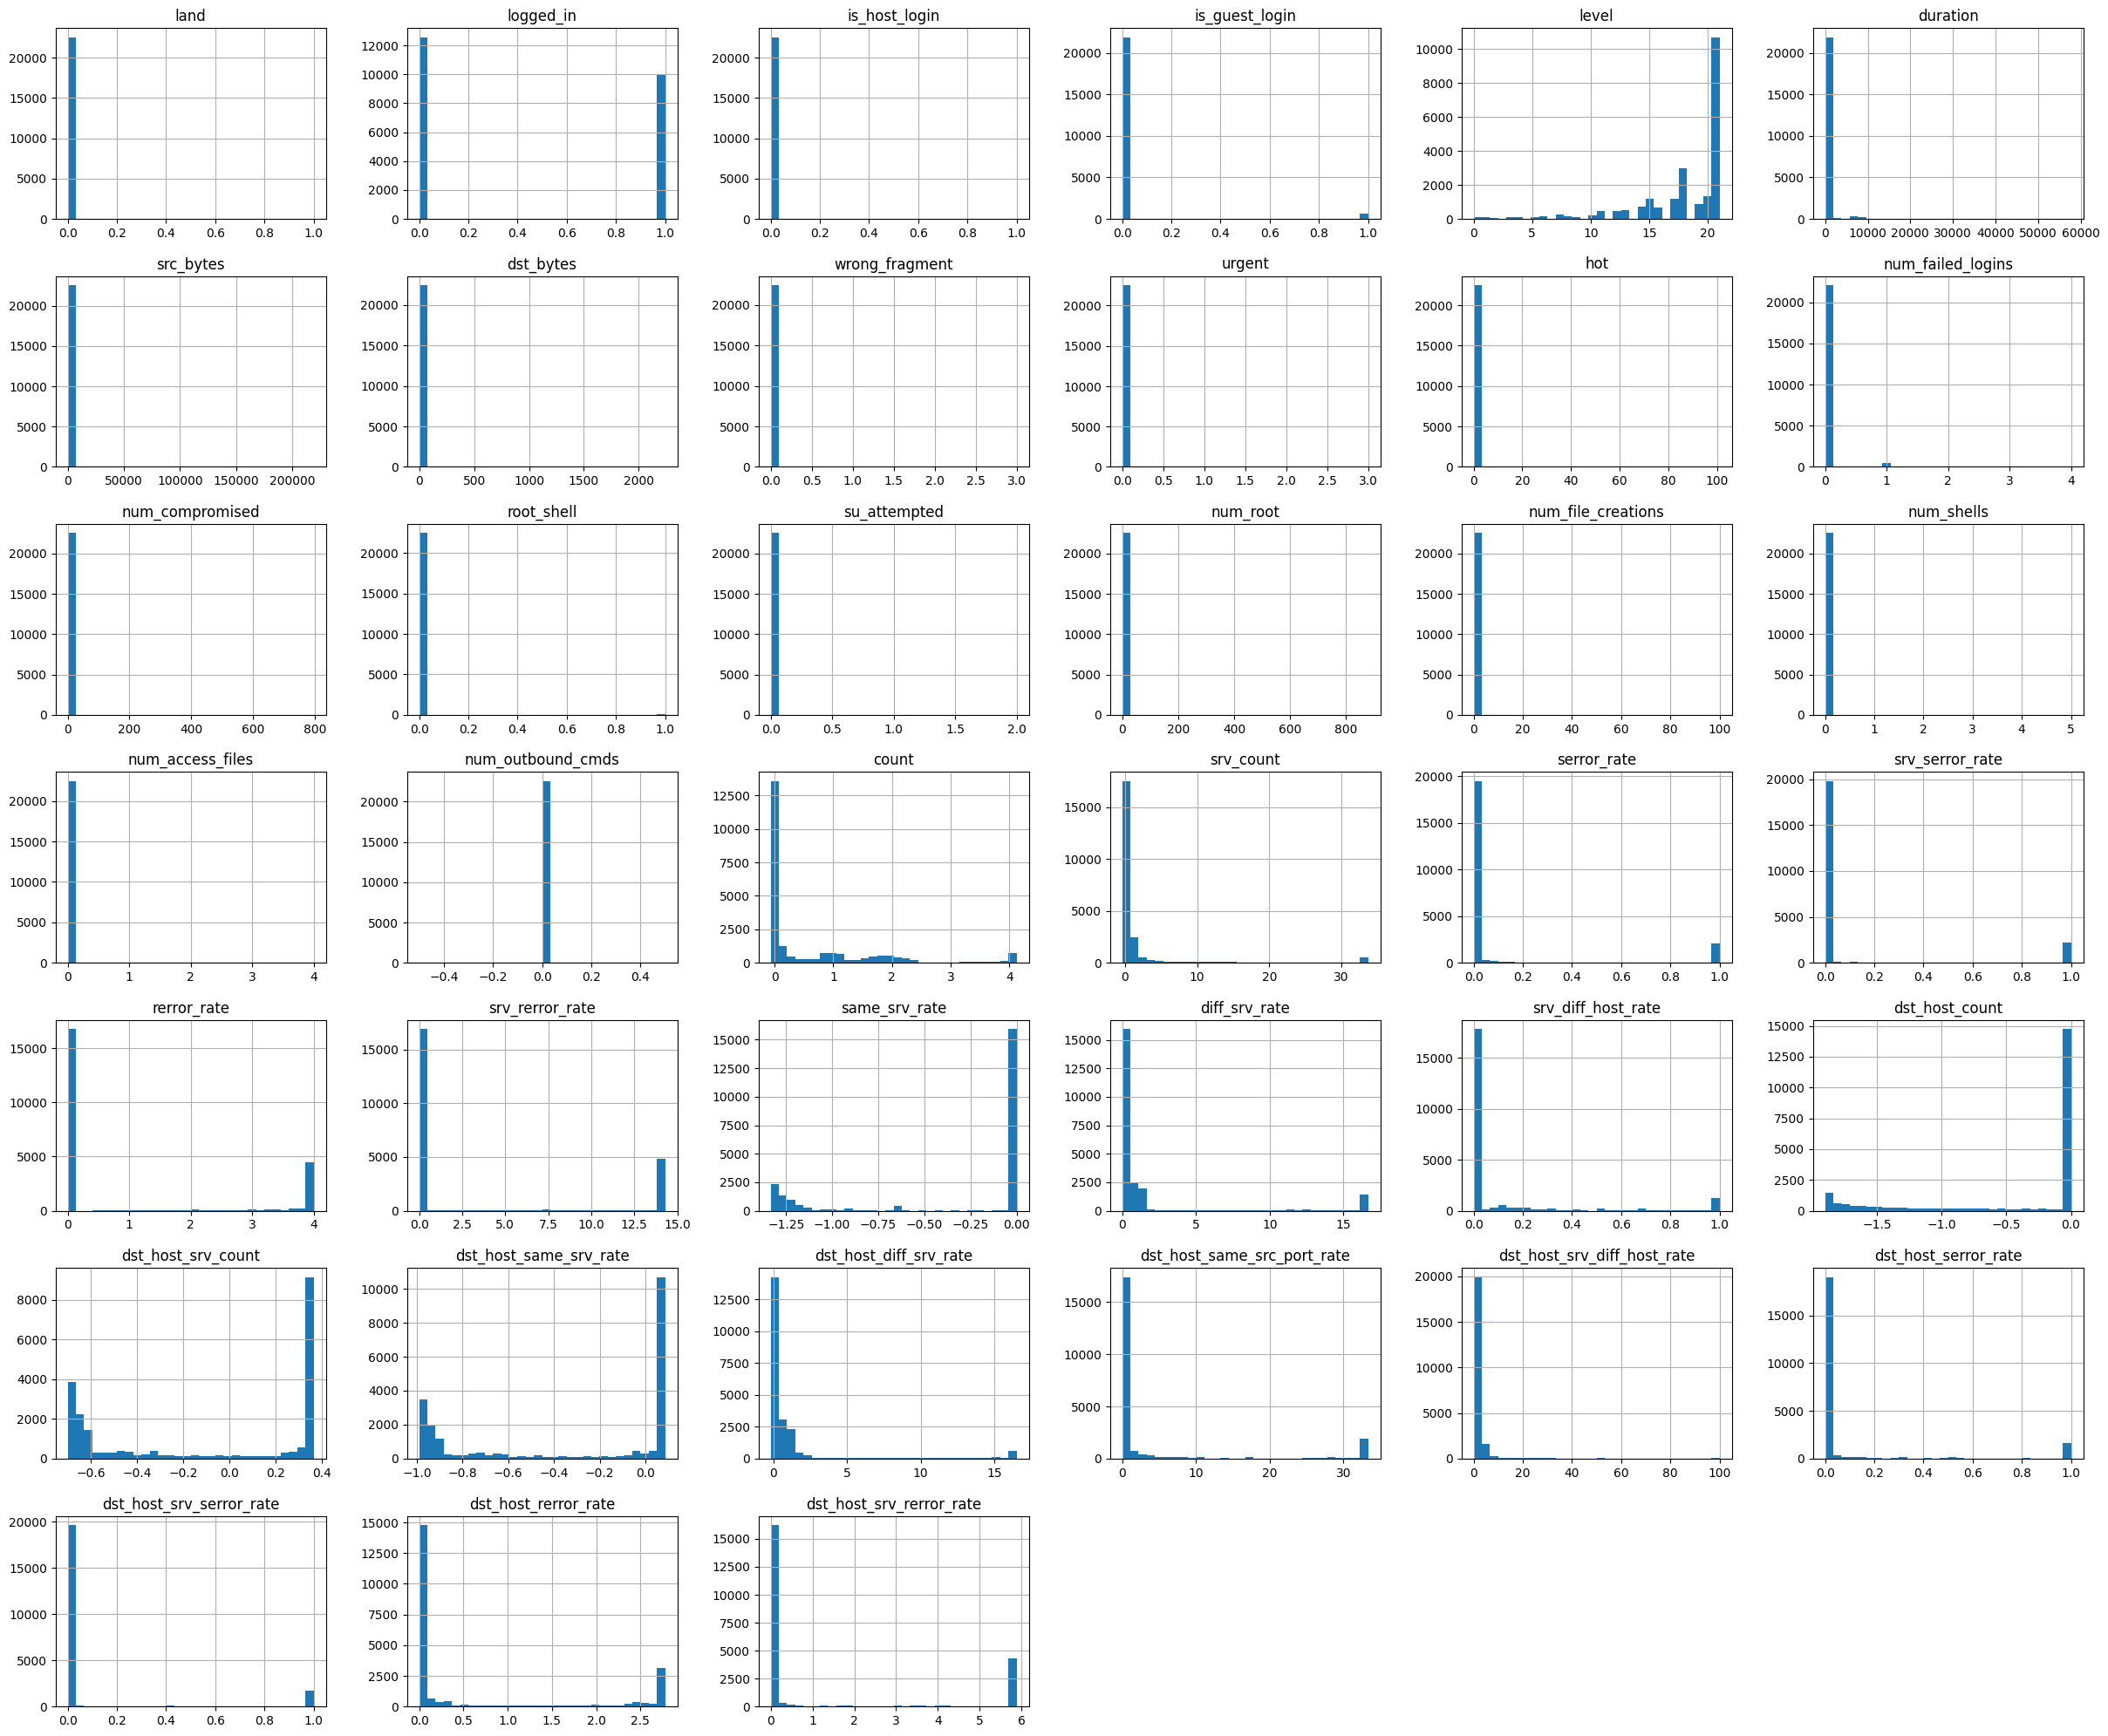

In [29]:
# Histogram
data_train.hist(bins=30, figsize=(30, 25));
plt.show();

<Figure size 2000x4000 with 0 Axes>

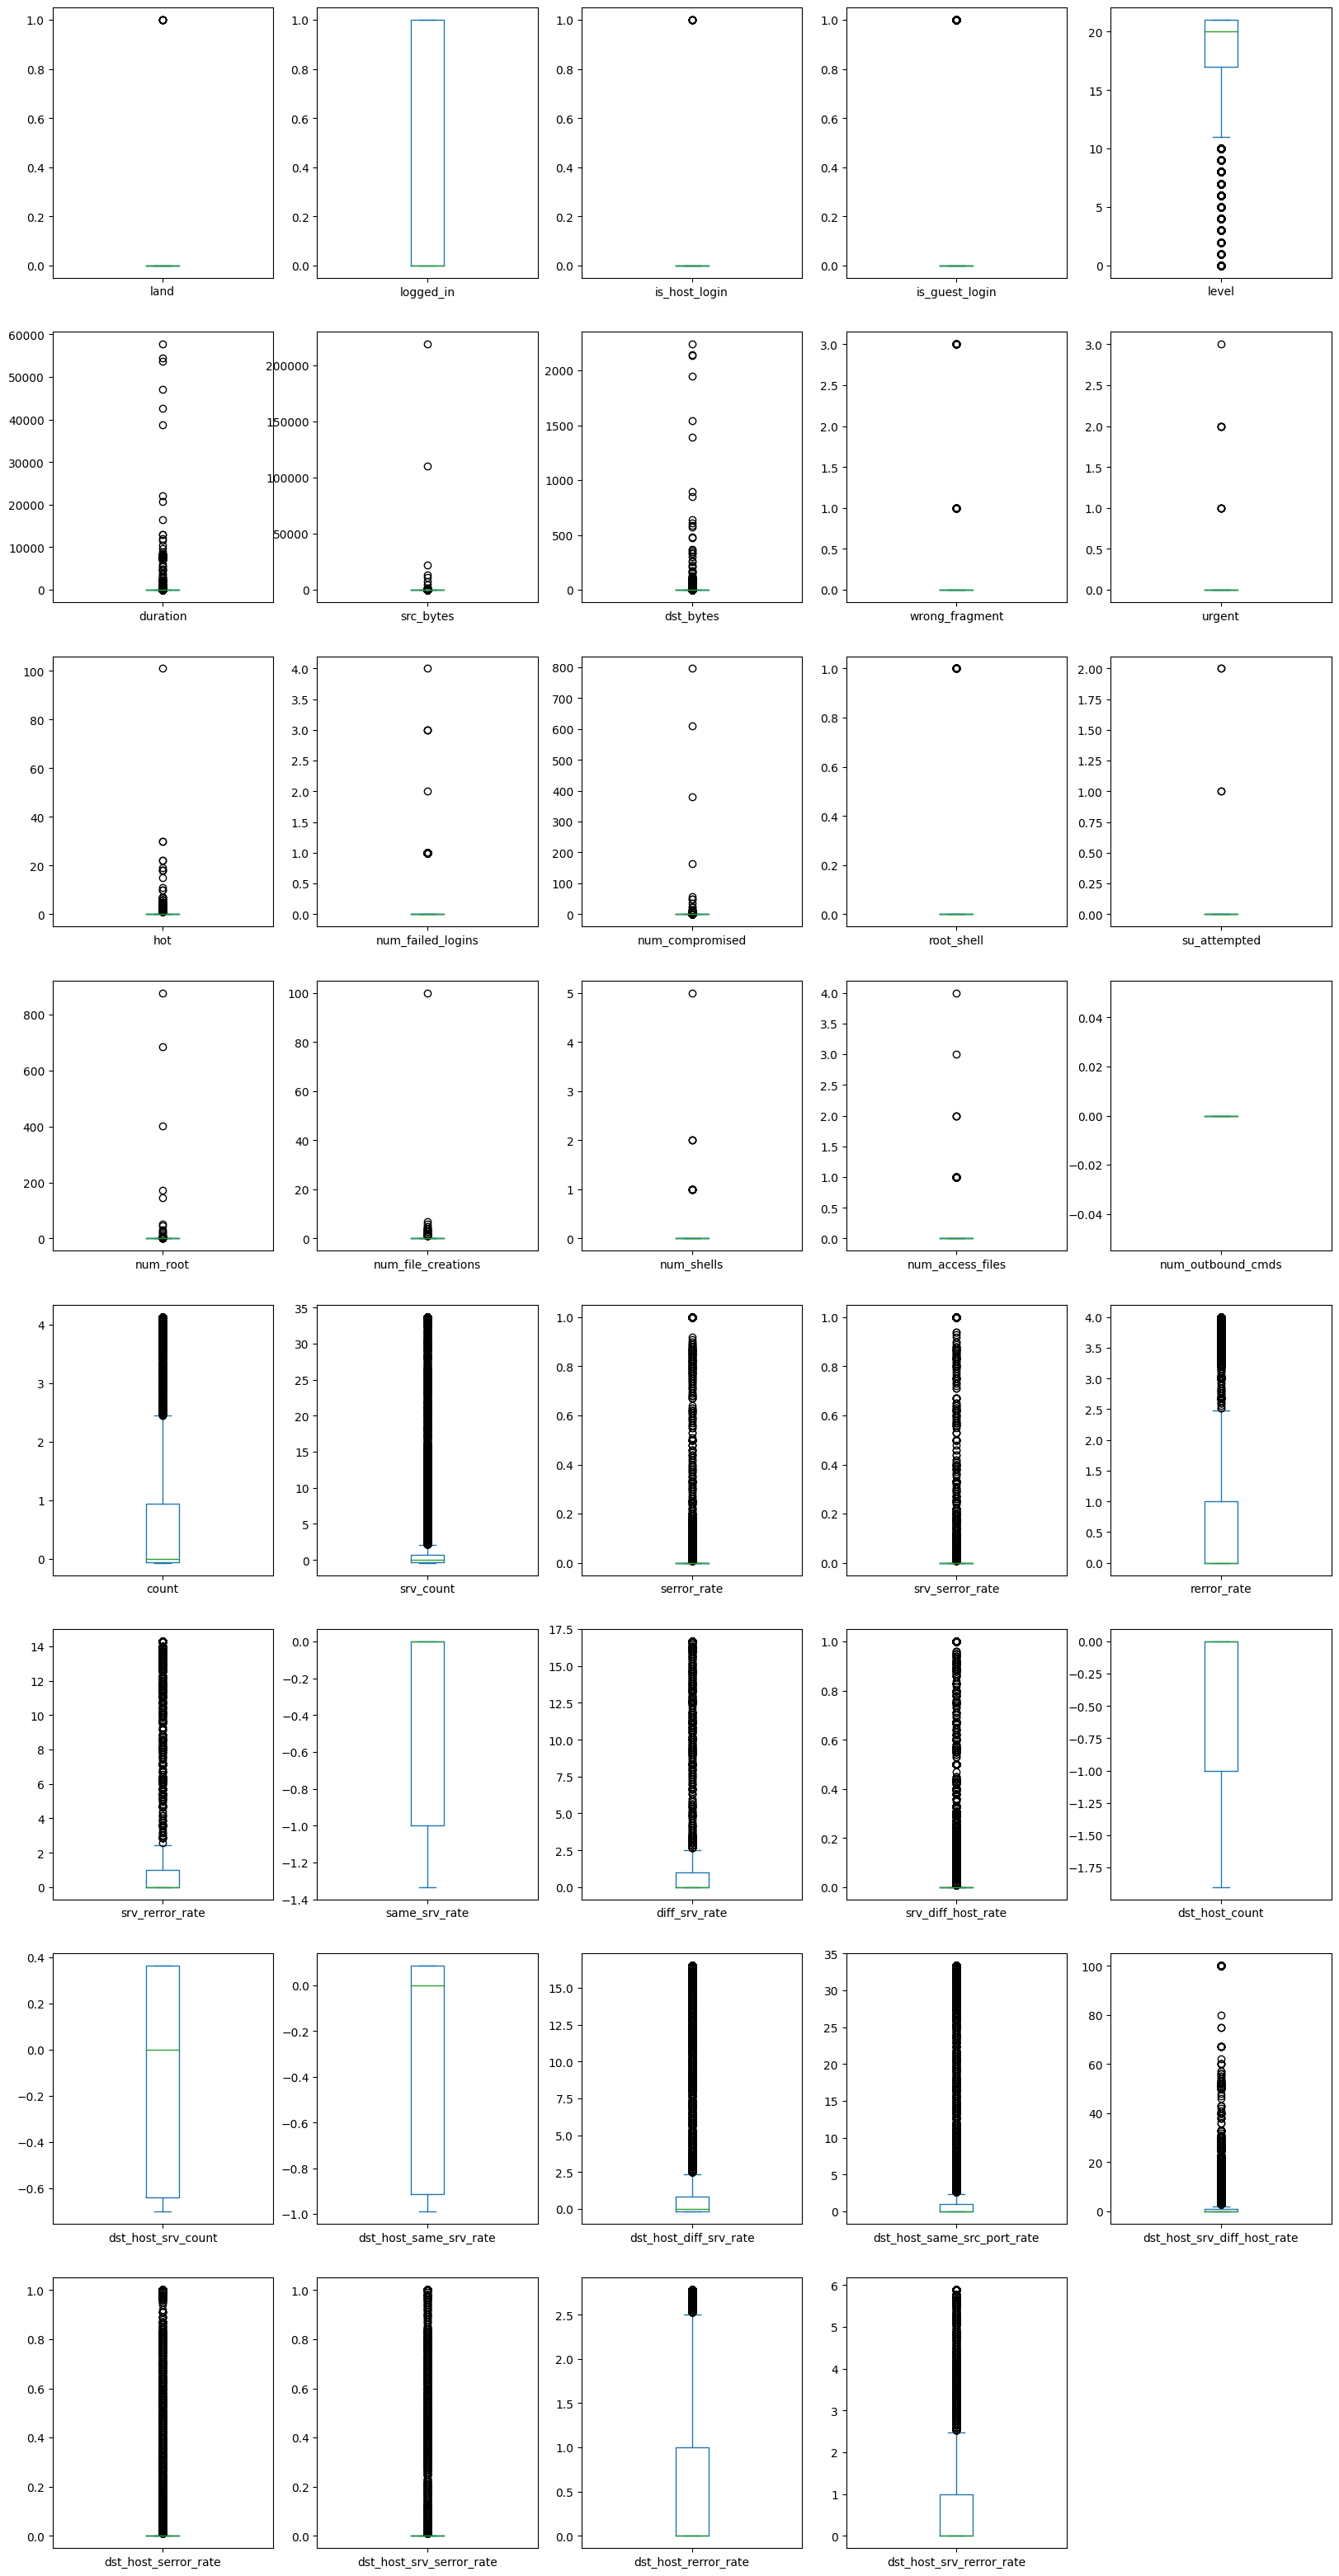

In [30]:
plt.figure(figsize=(20, 40));
data_train.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40));
plt.show();

In [31]:
# Bar Chart Graph
def bar_graph(feature):
    data_train[feature].value_counts().plot(kind="bar")

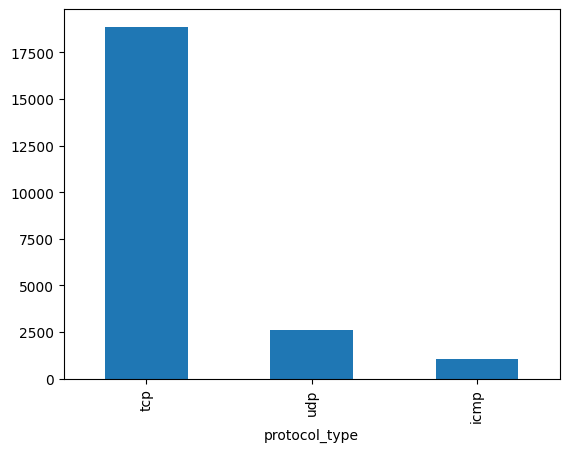

In [32]:
bar_graph('protocol_type')

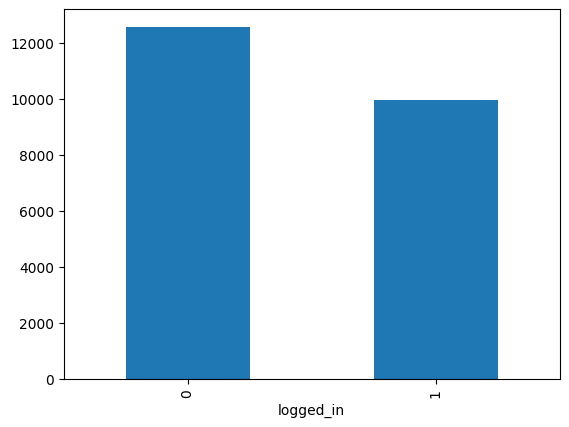

In [33]:
bar_graph('logged_in')
# logged_in (1 if successfully logged in; 0 otherwise): We notice that just 80000 packets are successfully logged in.

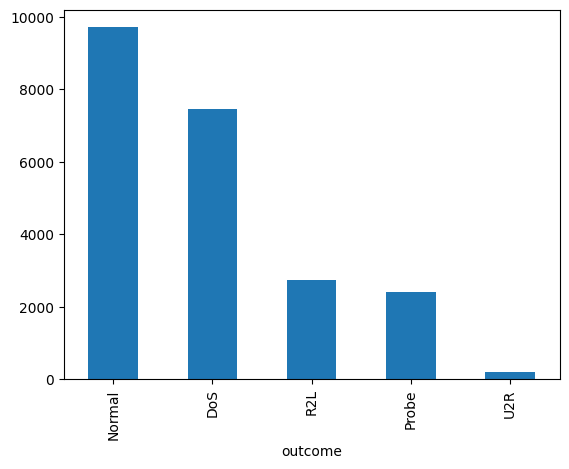

In [34]:
bar_graph('outcome')

In [35]:
# Pie Chart Graph 
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

In [36]:
data_train['outcome'].unique()

array(['DoS', 'Normal', 'Probe', 'R2L', 'U2R'], dtype=object)

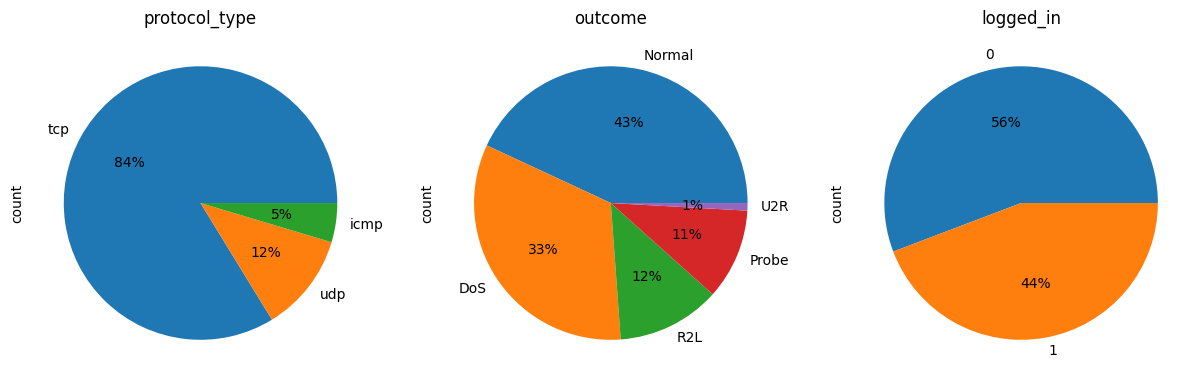

In [37]:
pie_plot(data_train, ['protocol_type', 'outcome', 'logged_in'], 1, 3)

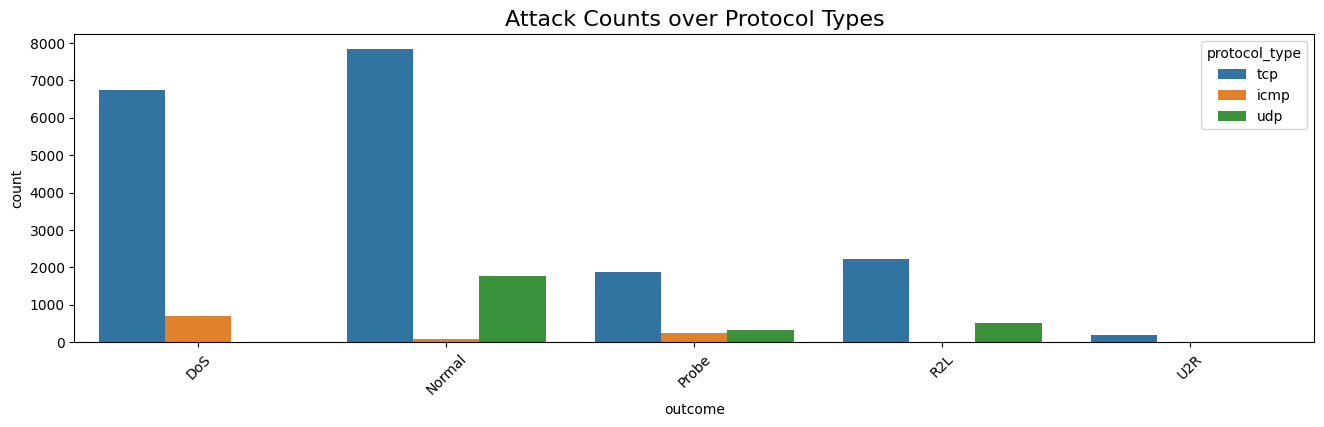

In [38]:
plt.figure(figsize=(16,4))
sns.countplot(x='outcome',data=data_train,hue='protocol_type')
plt.xticks(rotation=45)
plt.title('Attack Counts over Protocol Types',fontdict={'fontsize':16})
plt.show()

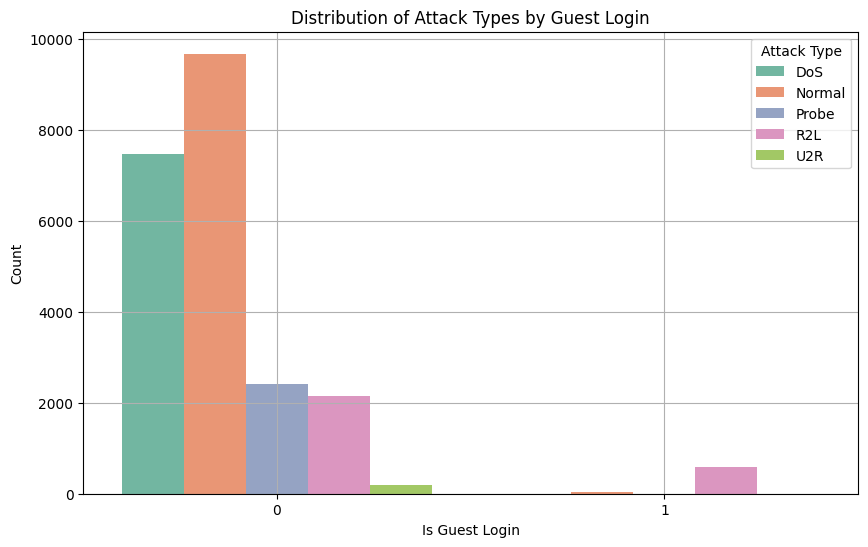

In [39]:
# Distribution of Attack Types by Guest Login
plt.figure(figsize=(10, 6))
sns.countplot(x='is_guest_login', hue='outcome', data=data_train, palette='Set2')
plt.xlabel('Is Guest Login')
plt.ylabel('Count')
plt.title('Distribution of Attack Types by Guest Login')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

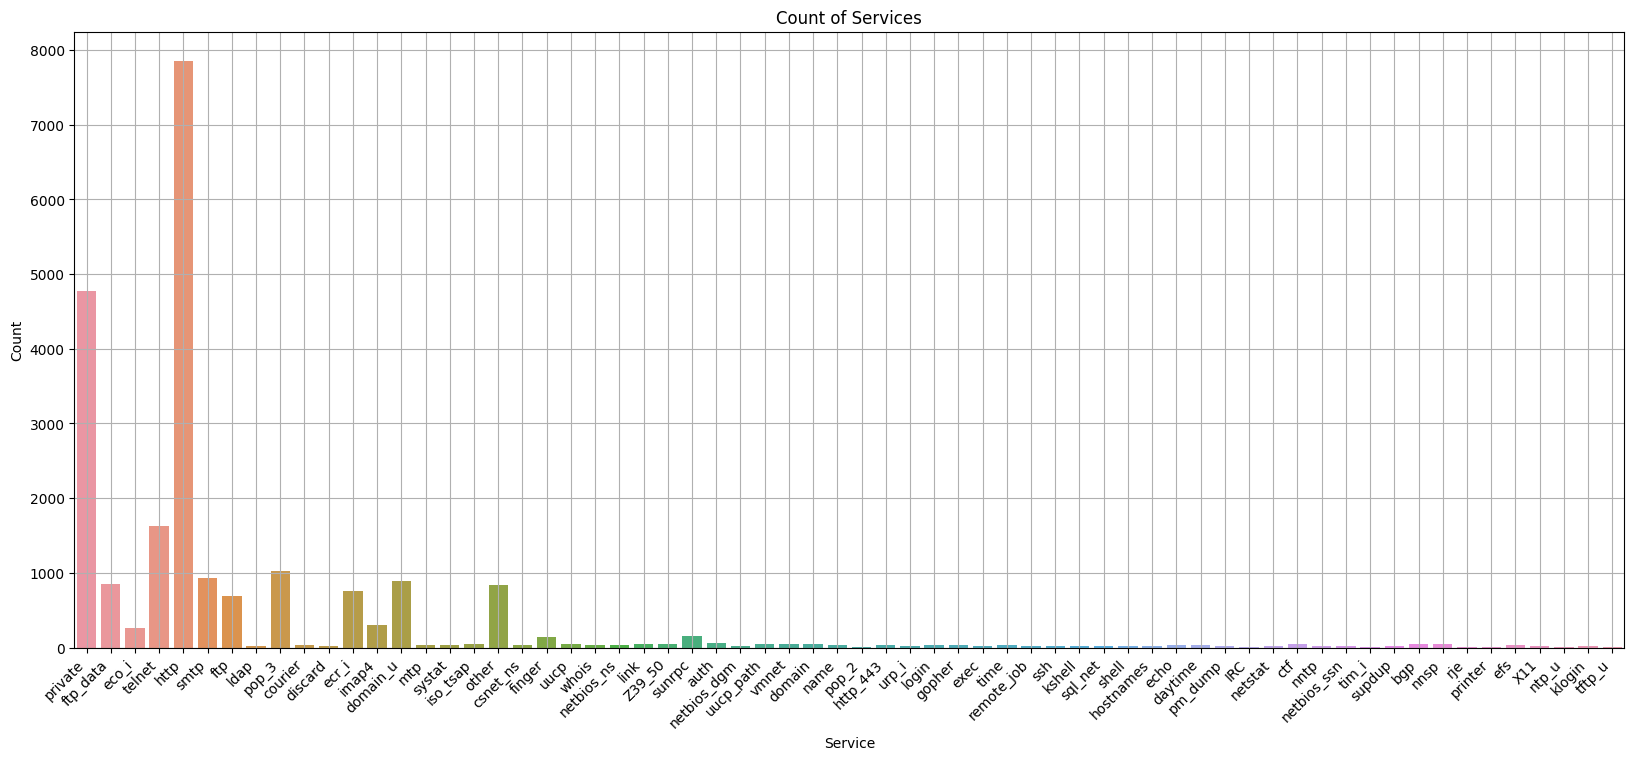

In [40]:
# Service used general
plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', data=data_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Count of Services')
plt.grid(True)
plt.show()

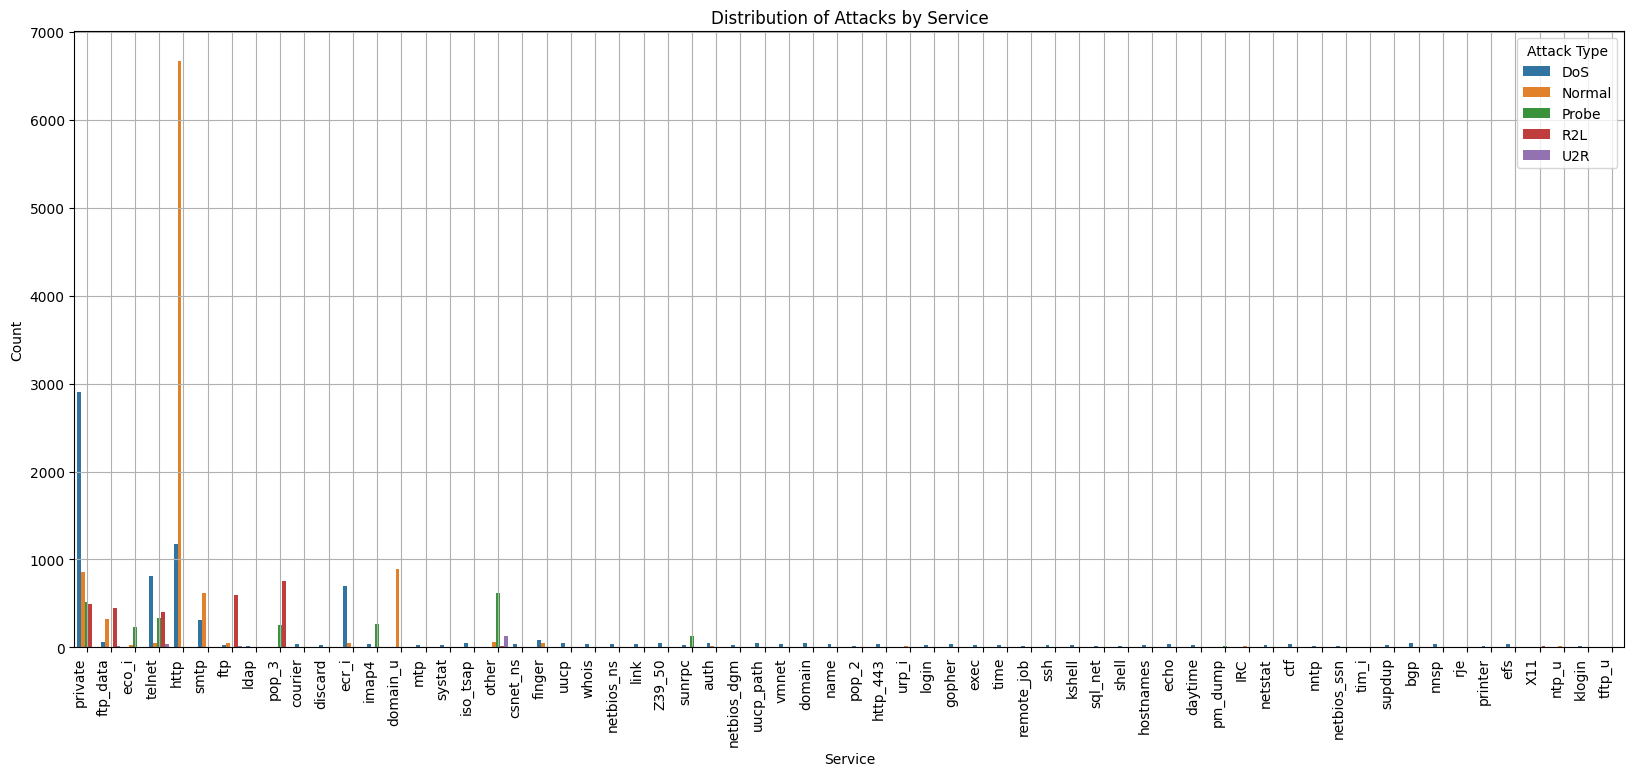

In [41]:
# Service used effect on attacks
plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', hue='outcome', data=data_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Distribution of Attacks by Service')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

# Data Correlation

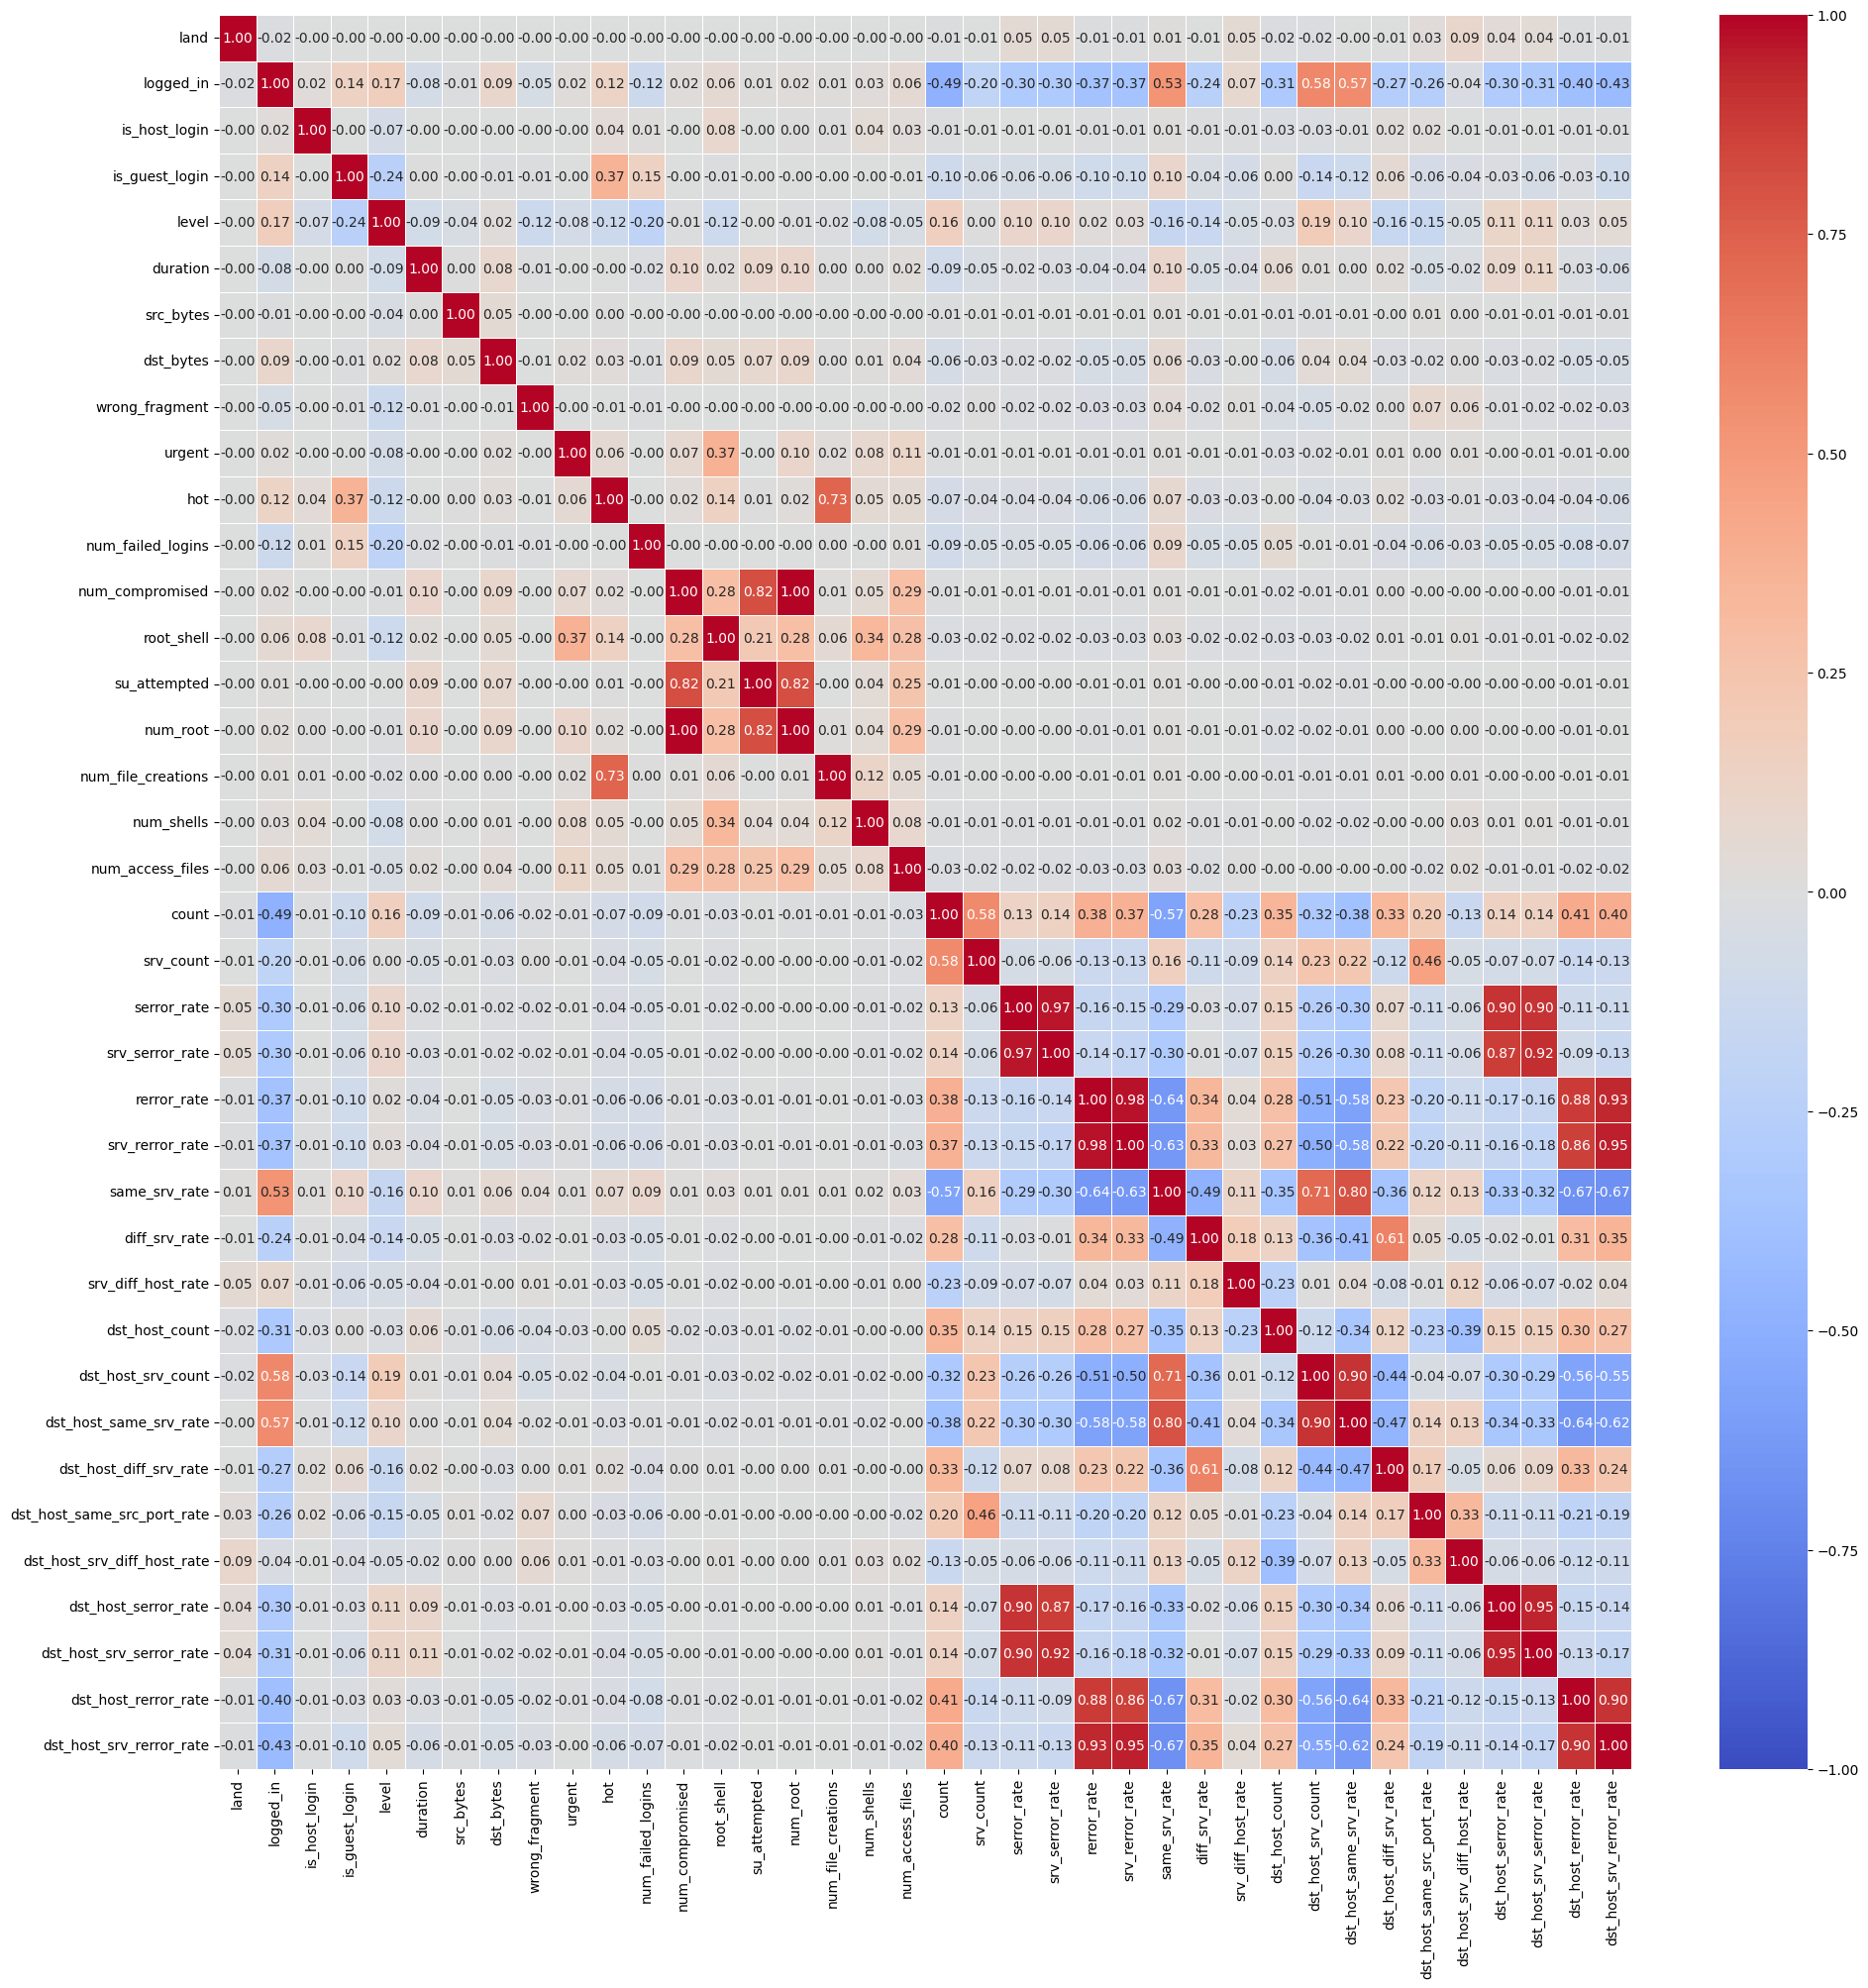

In [42]:
df = data_train.dropna(axis=1)
# Keep columns where there are more than 1 unique value
df = df[[col for col in df if df[col].nunique() > 1]]
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()
plt.figure(figsize=(23, 23))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.show()

# Principal Component Analysis

In [43]:
from sklearn.preprocessing import LabelEncoder

# Assuming data_train is your original DataFrame
data_train_Dt_reduction = data_train[['is_guest_login', 'logged_in', 'srv_diff_host_rate', 'level', 'service', 'dst_host_same_src_port_rate', 'dst_host_rerror_rate', 'num_shells']]

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
data_train_Dt_reduction['service'] = label_encoder.fit_transform(data_train_Dt_reduction['service'])

In [44]:
data_train_Dt_reduction.shape

(22543, 8)

In [45]:
x = scaled_train.drop('outcome' , axis = 1).values
y = scaled_train['outcome'].values

pca = PCA(n_components=20)
pca = pca.fit(x)
x_reduced = pca.transform(x)
print("Number of original features is {} and of reduced features is {}".format(x.shape[1], x_reduced.shape[1]))
print(data_train_Dt_reduction.shape)
print(x_reduced.shape)

Number of original features is 117 and of reduced features is 20
(22543, 8)
(22543, 20)


Information about columns selected by PCA

In [46]:
# Get the loading matrix
loading_matrix = pca.components_

# Create a DataFrame for better visualization
features = scaled_train.drop('outcome', axis=1).columns
loading_df = pd.DataFrame(loading_matrix.T, index=features, columns=[f'PC{i+1}' for i in range(loading_matrix.shape[0])])

# Sum the absolute values of the loadings for each feature across all principal components
loading_sums = loading_df.abs().sum(axis=1)

# Sort the features by their aggregated influence and select the top 20
top_20_features = loading_sums.sort_values(ascending=False).head(20)

print("Top 20 contributing features across all principal components:")
print(top_20_features)

Top 20 contributing features across all principal components:
srv_count                      2.539867
dst_host_srv_rerror_rate       2.497075
srv_rerror_rate                2.449252
dst_host_count                 2.325716
diff_srv_rate                  2.272593
dst_host_rerror_rate           2.243205
count                          2.230131
dst_host_diff_srv_rate         2.228042
dst_host_same_src_port_rate    2.140870
level                          1.985683
num_compromised                1.967499
num_root                       1.926860
num_file_creations             1.916598
dst_host_srv_diff_host_rate    1.898639
hot                            1.736969
rerror_rate                    1.535739
service_http                   1.459831
logged_in                      1.306619
flag_SF                        1.206068
dst_host_srv_count             1.113861
dtype: float64


# Data Splitting

In [47]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Assuming y contains the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Perform the train-test split
x_train, x_test, y_train, y_test = train_test_split(data_train_Dt_reduction, y_encoded, test_size=0.2, random_state=42)
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y_encoded, test_size=0.2, random_state=42)


# Classification Method

In [48]:
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

kernal_evals = dict()

def evaluate_classification(model, model_name, X_train, X_test, y_train, y_test):
    # Record the start time for training
    start_train_time = time.time()
    model.fit(X_train, y_train)
    end_train_time = time.time()

    # Calculate training time
    train_time = end_train_time - start_train_time

    # Record the start time for testing
    start_test_time = time.time()
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    end_test_time = time.time()

    # Calculate testing time
    test_time = end_test_time - start_test_time

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    train_precision = precision_score(y_train, y_pred_train, average='weighted')
    test_precision = precision_score(y_test, y_pred_test, average='weighted')

    train_recall = recall_score(y_train, y_pred_train, average='weighted')
    test_recall = recall_score(y_test, y_pred_test, average='weighted')

    train_f1 = f1_score(y_train, y_pred_train, average='weighted')
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')

    kernal_evals[str(model_name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, train_time, test_time]

    print(f"{model_name} - Training accuracy: {train_accuracy:.4f}")
    print(f"{model_name} - Test accuracy: {test_accuracy:.4f}")
    print(f"{model_name} - Training precision: {train_precision:.4f}")
    print(f"{model_name} - Test precision: {test_precision:.4f}")
    print(f"{model_name} - Training recall: {train_recall:.4f}")
    print(f"{model_name} - Test recall: {test_recall:.4f}")
    print(f"{model_name} - Training F1 score: {train_f1:.4f}")
    print(f"{model_name} - Test F1 score: {test_f1:.4f}")
    print(f"{model_name} - Training time: {train_time:.4f} seconds")
    print(f"{model_name} - Testing time: {test_time:.4f} seconds")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.grid(False)
    disp.plot(ax=ax)
    plt.show()

# Classification outcome column (Using Decision Tress Columns)

Note: X ==> 8 Columns Selected by DT  &&  Y ==> outcome Column

Logistic Regression

LR with Features DT - Training accuracy: 0.7576
LR with Features DT - Test accuracy: 0.7556
LR with Features DT - Training precision: 0.7471
LR with Features DT - Test precision: 0.7439
LR with Features DT - Training recall: 0.7576
LR with Features DT - Test recall: 0.7556
LR with Features DT - Training F1 score: 0.7496
LR with Features DT - Test F1 score: 0.7471
LR with Features DT - Training time: 0.8384 seconds
LR with Features DT - Testing time: 0.0090 seconds


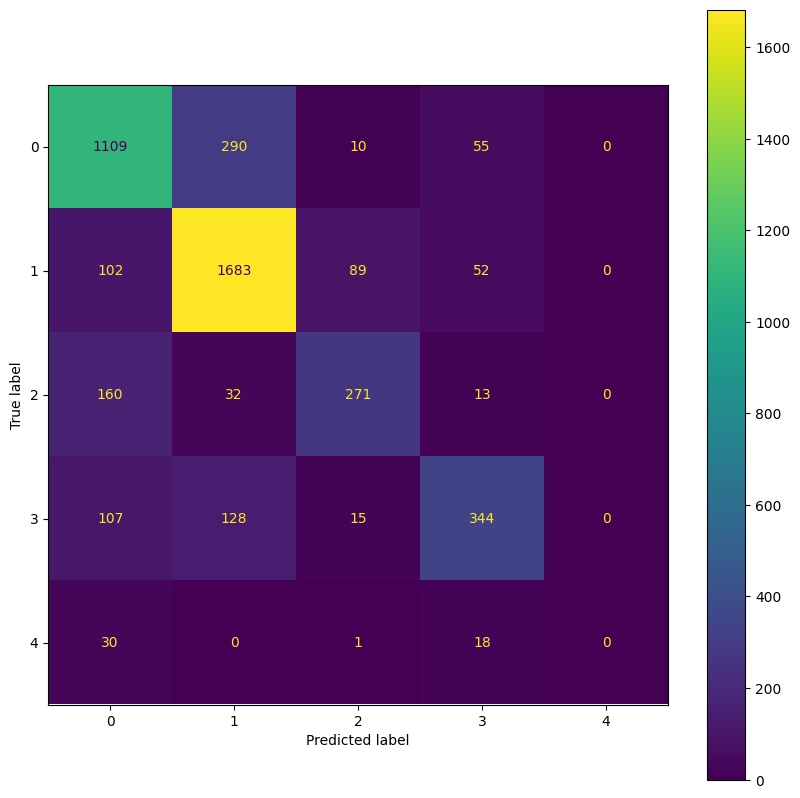

-----------------------------------------------------------------------------------------------------------------------------
LR with PCA Features - Training accuracy: 0.7681
LR with PCA Features - Test accuracy: 0.7591
LR with PCA Features - Training precision: 0.7749
LR with PCA Features - Test precision: 0.7611
LR with PCA Features - Training recall: 0.7681
LR with PCA Features - Test recall: 0.7591
LR with PCA Features - Training F1 score: 0.7601
LR with PCA Features - Test F1 score: 0.7492
LR with PCA Features - Training time: 1.4417 seconds
LR with PCA Features - Testing time: 0.0050 seconds


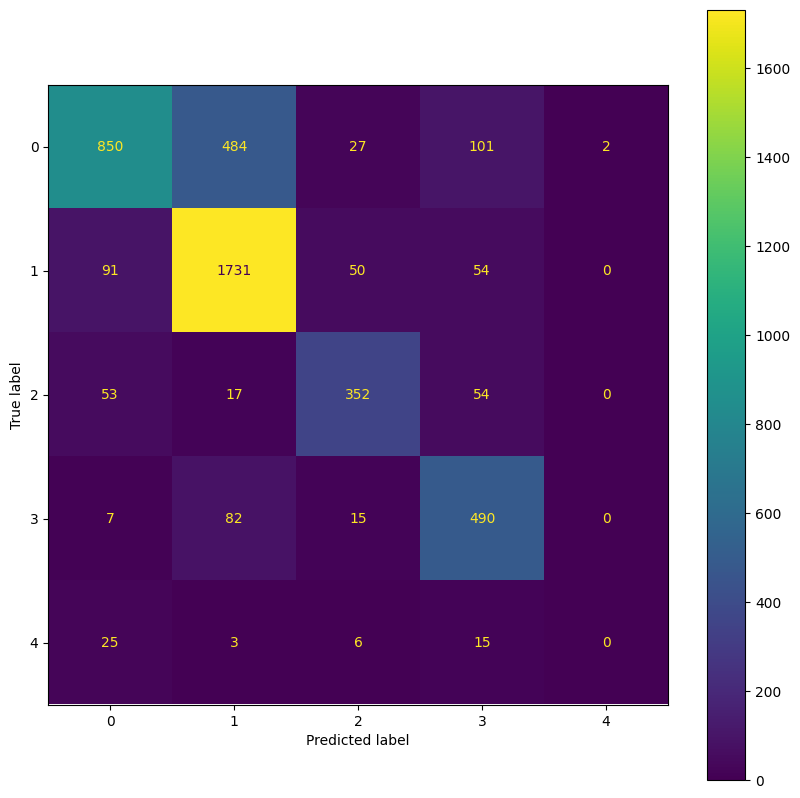

In [49]:
from sklearn.linear_model import LogisticRegression

# Fit and evaluate Logistic Regression model using manually selected features
lr_manual = LogisticRegression().fit(x_train, y_train)
evaluate_classification(lr_manual, "LR with Features DT", x_train, x_test, y_train, y_test)
print('-----------------------------------------------------------------------------------------------------------------------------')
# Fit and evaluate Logistic Regression model using PCA selected features
lr_pca = LogisticRegression().fit(x_train_reduced, y_train_reduced)
evaluate_classification(lr_pca, "LR with PCA Features", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)


k-nearest neighbors

KNN with Features DT - Training accuracy: 0.9788
KNN with Features DT - Test accuracy: 0.9721
KNN with Features DT - Training precision: 0.9789
KNN with Features DT - Test precision: 0.9722
KNN with Features DT - Training recall: 0.9788
KNN with Features DT - Test recall: 0.9721
KNN with Features DT - Training F1 score: 0.9788
KNN with Features DT - Test F1 score: 0.9720
KNN with Features DT - Training time: 0.1037 seconds
KNN with Features DT - Testing time: 2.1722 seconds


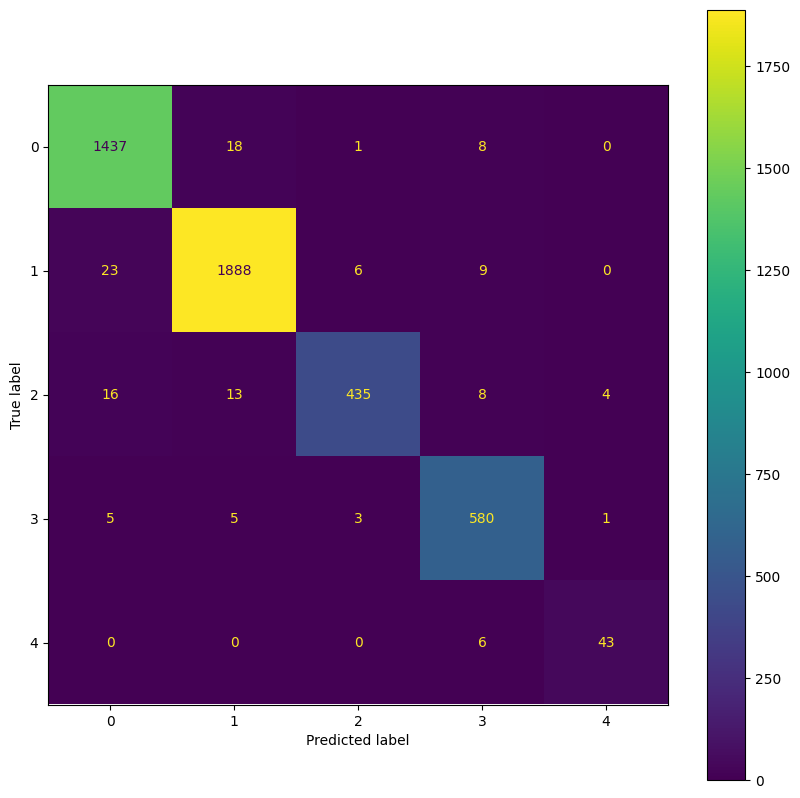

-----------------------------------------------------------------------------------------------------------------------------
KNN with PCA Features - Training accuracy: 0.9882
KNN with PCA Features - Test accuracy: 0.9820
KNN with PCA Features - Training precision: 0.9881
KNN with PCA Features - Test precision: 0.9819
KNN with PCA Features - Training recall: 0.9882
KNN with PCA Features - Test recall: 0.9820
KNN with PCA Features - Training F1 score: 0.9881
KNN with PCA Features - Test F1 score: 0.9819
KNN with PCA Features - Training time: 0.0040 seconds
KNN with PCA Features - Testing time: 1.6792 seconds


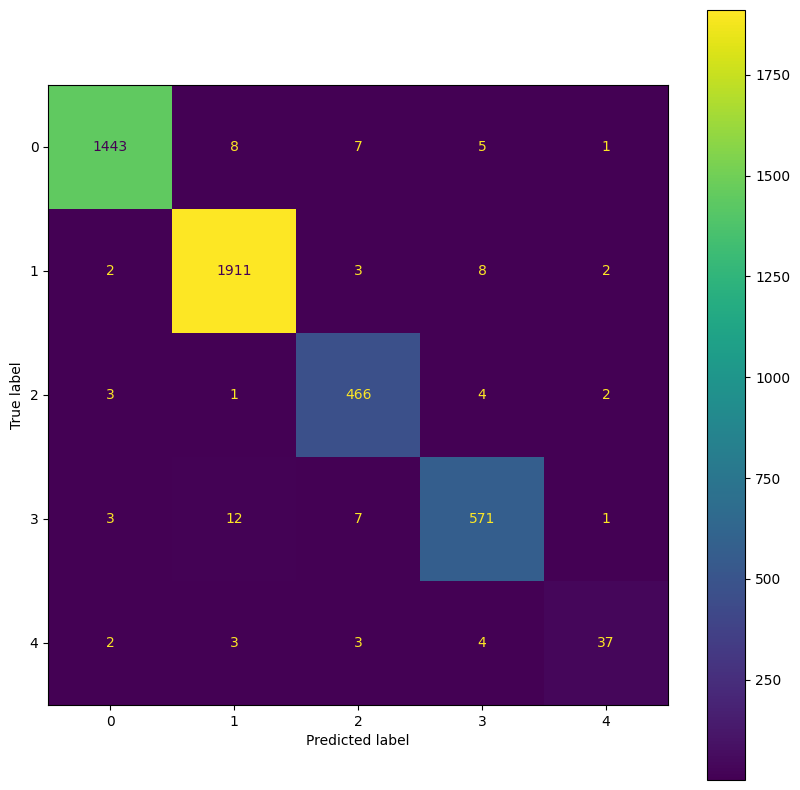

In [50]:
# Fit and evaluate KNN model using manually selected features
knn_manual = KNeighborsClassifier().fit(x_train, y_train)
evaluate_classification(knn_manual, "KNN with Features DT", x_train, x_test, y_train, y_test)

print('-----------------------------------------------------------------------------------------------------------------------------')

# Fit and evaluate KNN model using PCA selected features
knn_pca = KNeighborsClassifier().fit(x_train_reduced, y_train_reduced)
evaluate_classification(knn_pca, "KNN with PCA Features", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)


Naive Bayes

NB with Features DT - Training accuracy: 0.5438
NB with Features DT - Test accuracy: 0.5394
NB with Features DT - Training precision: 0.7419
NB with Features DT - Test precision: 0.7413
NB with Features DT - Training recall: 0.5438
NB with Features DT - Test recall: 0.5394
NB with Features DT - Training F1 score: 0.5125
NB with Features DT - Test F1 score: 0.5072
NB with Features DT - Training time: 0.0120 seconds
NB with Features DT - Testing time: 0.0279 seconds


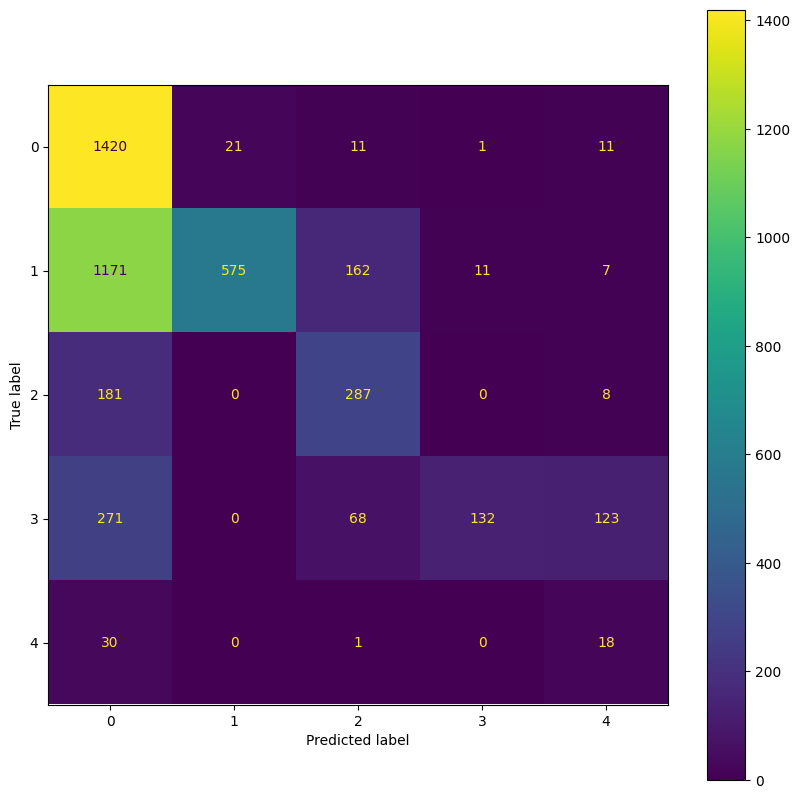

-----------------------------------------------------------------------------------------------------------------------------
NB with PCA Features - Training accuracy: 0.4109
NB with PCA Features - Test accuracy: 0.4107
NB with PCA Features - Training precision: 0.6294
NB with PCA Features - Test precision: 0.6325
NB with PCA Features - Training recall: 0.4109
NB with PCA Features - Test recall: 0.4107
NB with PCA Features - Training F1 score: 0.4374
NB with PCA Features - Test F1 score: 0.4381
NB with PCA Features - Training time: 0.0150 seconds
NB with PCA Features - Testing time: 0.0429 seconds


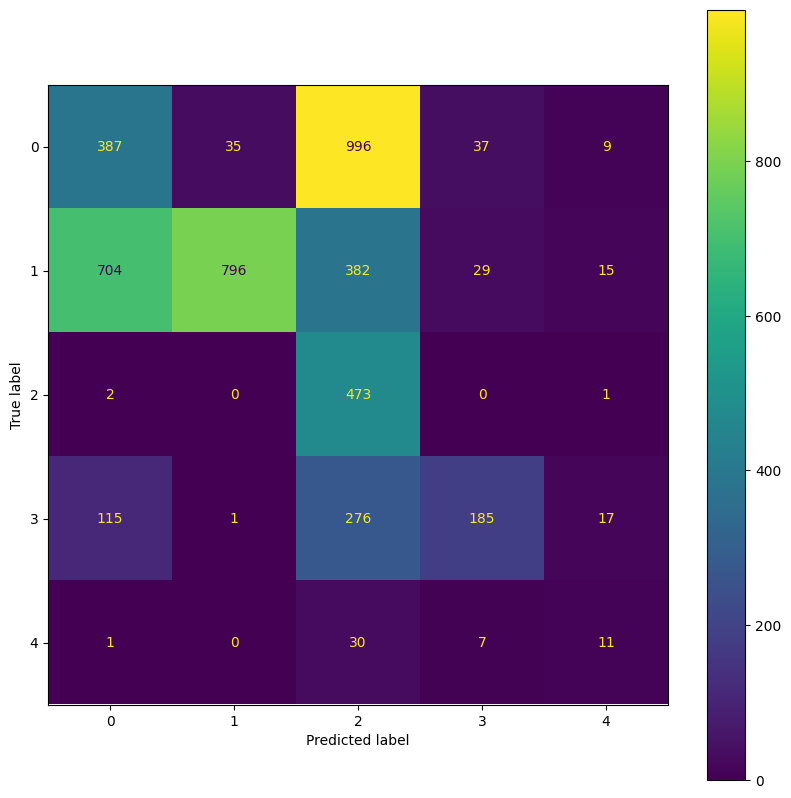

In [51]:
# Fit and evaluate Naiive Bayes model using manually selected features
gnb_manual = GaussianNB().fit(x_train, y_train)
evaluate_classification(gnb_manual, "NB with Features DT", x_train, x_test, y_train, y_test)

print('-----------------------------------------------------------------------------------------------------------------------------')

# Fit and evaluate Naiive Bayes model using PCA selected features
gnb_pca = GaussianNB().fit(x_train_reduced, y_train_reduced)
evaluate_classification(gnb_pca, "NB with PCA Features", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

Support Vector Machines

SVM with Features DT - Training accuracy: 0.7477
SVM with Features DT - Test accuracy: 0.7418
SVM with Features DT - Training precision: 0.7475
SVM with Features DT - Test precision: 0.7434
SVM with Features DT - Training recall: 0.7477
SVM with Features DT - Test recall: 0.7418
SVM with Features DT - Training F1 score: 0.7391
SVM with Features DT - Test F1 score: 0.7330
SVM with Features DT - Training time: 0.3381 seconds
SVM with Features DT - Testing time: 0.0080 seconds


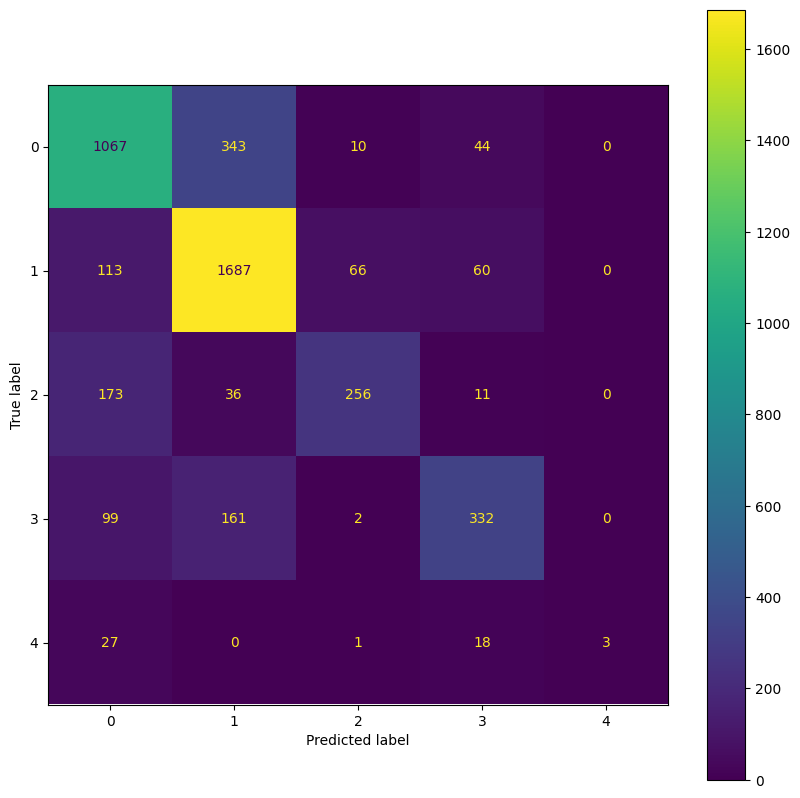

-----------------------------------------------------------------------------------------------------------------------------
SVM with PCA Features - Training accuracy: 0.9041
SVM with PCA Features - Test accuracy: 0.9031
SVM with PCA Features - Training precision: 0.9022
SVM with PCA Features - Test precision: 0.9016
SVM with PCA Features - Training recall: 0.9041
SVM with PCA Features - Test recall: 0.9031
SVM with PCA Features - Training F1 score: 0.9022
SVM with PCA Features - Test F1 score: 0.9011
SVM with PCA Features - Training time: 5.0859 seconds
SVM with PCA Features - Testing time: 0.0054 seconds


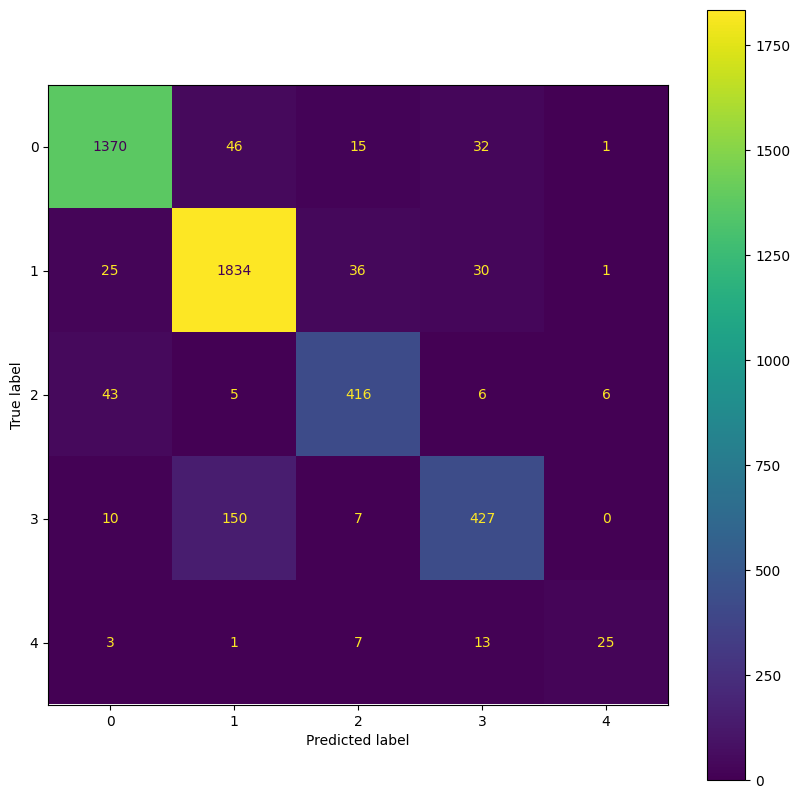

In [52]:
# Fit and evaluate SVM model using manually selected features
svc_manual = svm.LinearSVC().fit(x_train, y_train)
evaluate_classification(svc_manual, "SVM with Features DT", x_train, x_test, y_train, y_test)

print('-----------------------------------------------------------------------------------------------------------------------------')

# Fit and evaluate SVM model using PCA selected features
svc_pca = svm.LinearSVC().fit(x_train_reduced, y_train_reduced)
evaluate_classification(svc_pca, "SVM with PCA Features", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

Decision Tree

DT with Features DT - Training accuracy: 0.9936
DT with Features DT - Test accuracy: 0.9778
DT with Features DT - Training precision: 0.9936
DT with Features DT - Test precision: 0.9778
DT with Features DT - Training recall: 0.9936
DT with Features DT - Test recall: 0.9778
DT with Features DT - Training F1 score: 0.9936
DT with Features DT - Test F1 score: 0.9778
DT with Features DT - Training time: 0.0518 seconds
DT with Features DT - Testing time: 0.0210 seconds


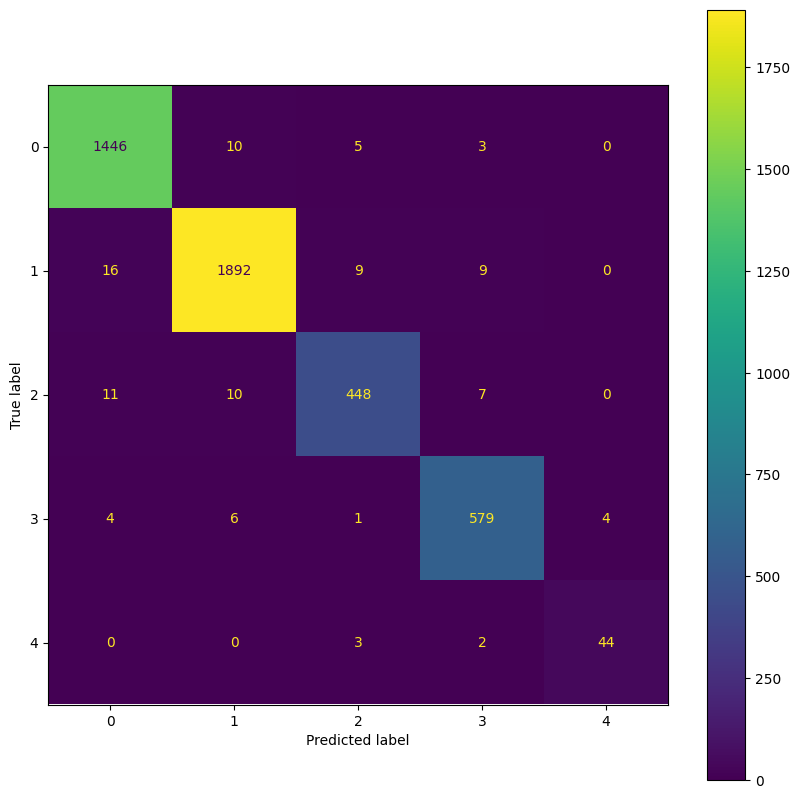

-----------------------------------------------------------------------------------------------------------------------------
DT with PCA Features - Training accuracy: 1.0000
DT with PCA Features - Test accuracy: 0.9834
DT with PCA Features - Training precision: 1.0000
DT with PCA Features - Test precision: 0.9834
DT with PCA Features - Training recall: 1.0000
DT with PCA Features - Test recall: 0.9834
DT with PCA Features - Training F1 score: 1.0000
DT with PCA Features - Test F1 score: 0.9833
DT with PCA Features - Training time: 1.2295 seconds
DT with PCA Features - Testing time: 0.0080 seconds


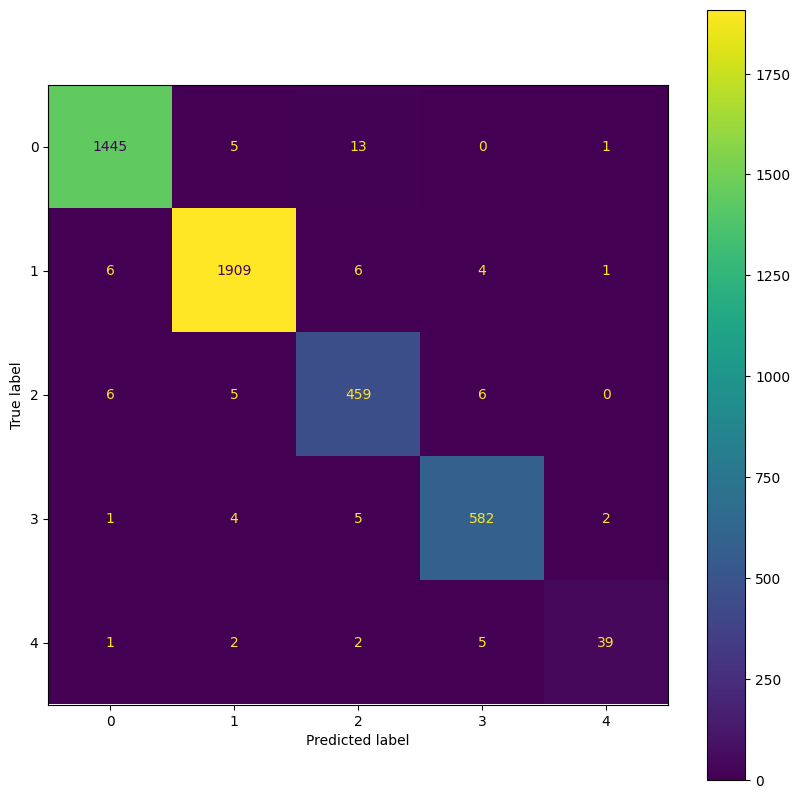

In [53]:
# Fit and evaluate DT model using manually selected features
dt_manual = DecisionTreeClassifier().fit(x_train, y_train)
evaluate_classification(dt_manual, "DT with Features DT", x_train, x_test, y_train, y_test)

print('-----------------------------------------------------------------------------------------------------------------------------')

# Fit and evaluate DT model using PCA selected features
dt_pca = DecisionTreeClassifier().fit(x_train_reduced, y_train_reduced)
evaluate_classification(dt_pca, "DT with PCA Features", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

Random forest

RF with Features DT - Training accuracy: 0.9936
RF with Features DT - Test accuracy: 0.9825
RF with Features DT - Training precision: 0.9936
RF with Features DT - Test precision: 0.9825
RF with Features DT - Training recall: 0.9936
RF with Features DT - Test recall: 0.9825
RF with Features DT - Training F1 score: 0.9936
RF with Features DT - Test F1 score: 0.9824
RF with Features DT - Training time: 1.4072 seconds
RF with Features DT - Testing time: 0.4208 seconds


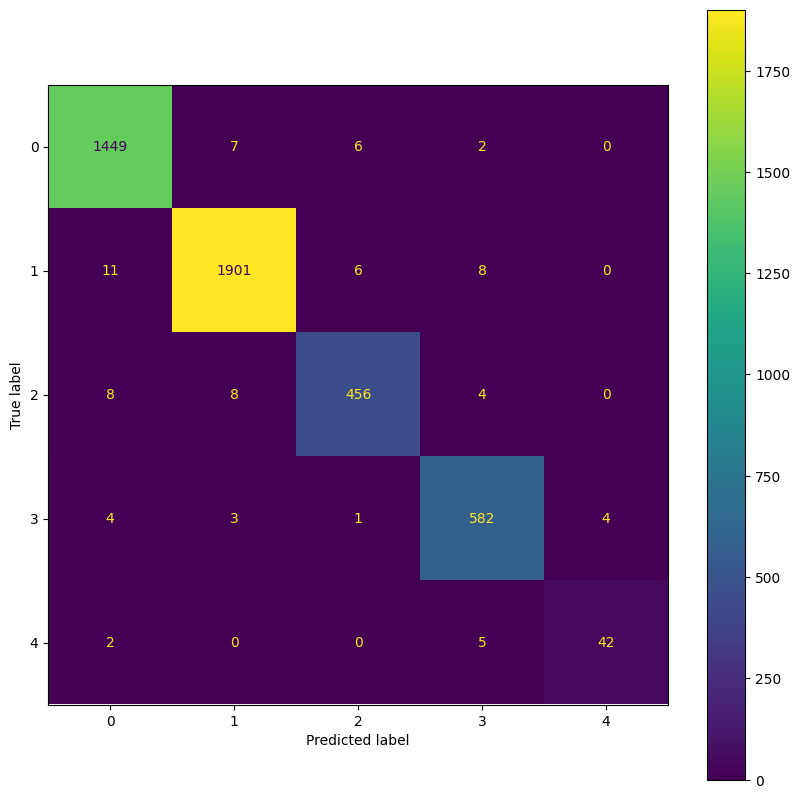

-----------------------------------------------------------------------------------------------------------------------------
RF with PCA Features - Training accuracy: 1.0000
RF with PCA Features - Test accuracy: 0.9931
RF with PCA Features - Training precision: 1.0000
RF with PCA Features - Test precision: 0.9932
RF with PCA Features - Training recall: 1.0000
RF with PCA Features - Test recall: 0.9931
RF with PCA Features - Training F1 score: 1.0000
RF with PCA Features - Test F1 score: 0.9931
RF with PCA Features - Training time: 14.9755 seconds
RF with PCA Features - Testing time: 0.3571 seconds


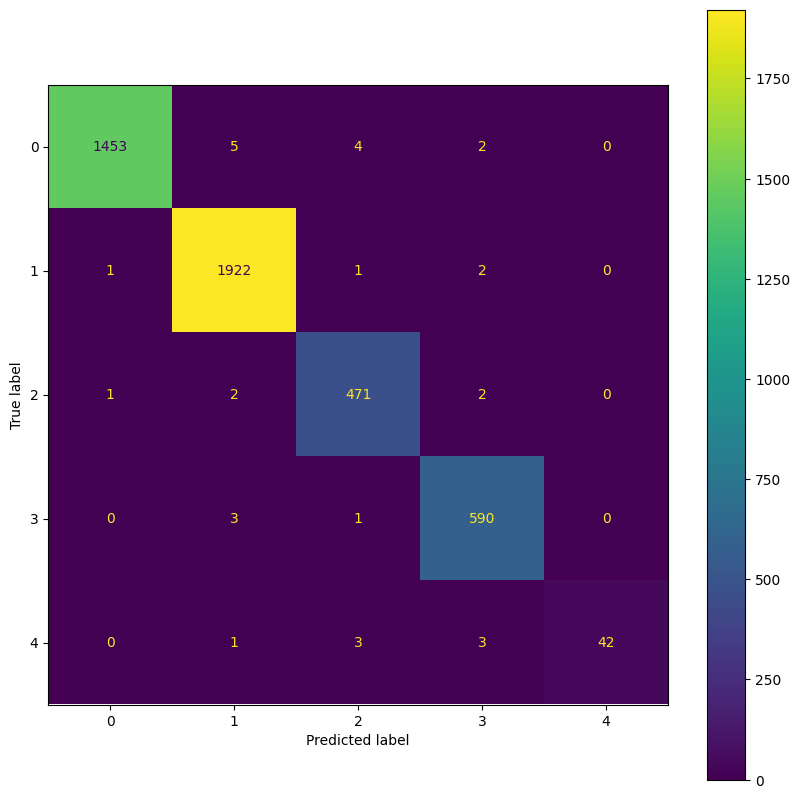

In [54]:
# Fit and evaluate RF model using manually selected features
rf_manual = RandomForestClassifier().fit(x_train, y_train)
evaluate_classification(rf_manual, "RF with Features DT", x_train, x_test, y_train, y_test)

print('-----------------------------------------------------------------------------------------------------------------------------')

# Fit and evaluate RF model using PCA selected features
rf_pca = RandomForestClassifier().fit(x_train_reduced, y_train_reduced)
evaluate_classification(rf_pca, "RF with PCA Features", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

Handle 100% Accurracy in PCA Features in Random Forest

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters (Adjusted): {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50}
RF with PCA Features with Final Params - Training accuracy: 0.9994
RF with PCA Features with Final Params - Test accuracy: 0.9925
RF with PCA Features with Final Params - Training precision: 0.9994
RF with PCA Features with Final Params - Test precision: 0.9925
RF with PCA Features with Final Params - Training recall: 0.9994
RF with PCA Features with Final Params - Test recall: 0.9925
RF with PCA Features with Final Params - Training F1 score: 0.9994
RF with PCA Features with Final Params - Test F1 score: 0.9924
RF with PCA Features with Final Params - Training time: 29.6967 seconds
RF with PCA Features with Final Params - Testing time: 0.5216 seconds


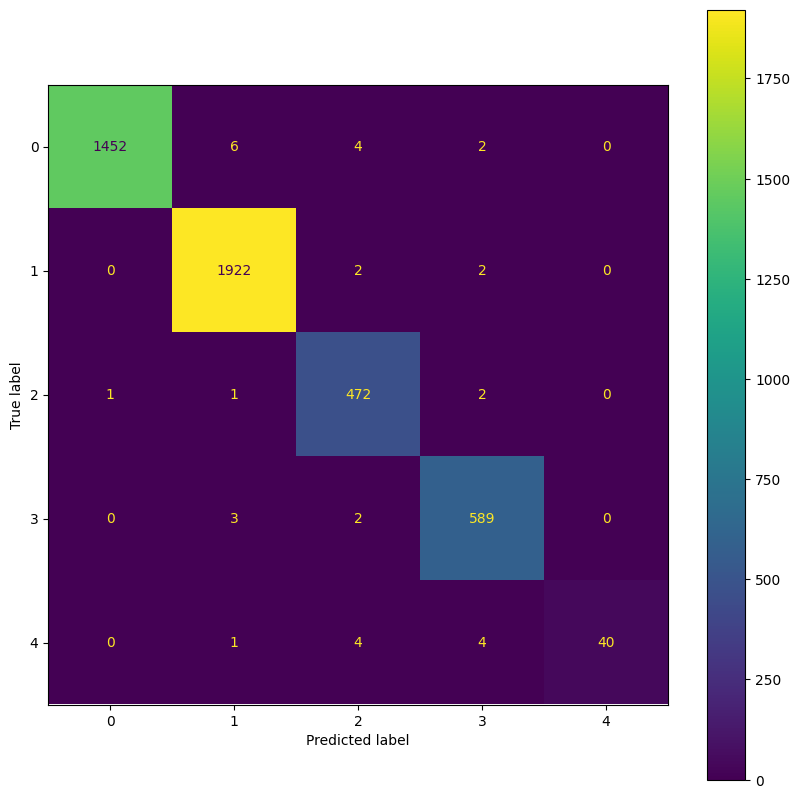

In [55]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
# Adjusted parameter grid for further tuning
param_dist_adjusted = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [5, 10, 15, 20],
    'min_samples_leaf': [2, 4, 6, 8],
    'max_features': ['auto', 'sqrt']
}

# Initialize the Random Forest Classifier
rf_adjusted = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV with the adjusted parameters
random_search_adjusted = RandomizedSearchCV(estimator=rf_adjusted, param_distributions=param_dist_adjusted, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the randomized search model
random_search_adjusted.fit(x_train_reduced, y_train_reduced)

# Get the best parameters
best_params_adjusted = random_search_adjusted.best_params_
print(f"Best parameters (Adjusted): {best_params_adjusted}")

# Train the Random Forest with the adjusted best parameters
rf_best_adjusted = RandomForestClassifier(**best_params_adjusted, random_state=42)
rf_best_adjusted.fit(x_train_reduced, y_train_reduced)

# Evaluate the tuned model
evaluate_classification(rf_best_adjusted, "RF with PCA Features with Final Params", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

XGBoost

XGB with Features DT - Training accuracy: 0.9834
XGB with Features DT - Test accuracy: 0.9778
XGB with Features DT - Training precision: 0.9835
XGB with Features DT - Test precision: 0.9779
XGB with Features DT - Training recall: 0.9834
XGB with Features DT - Test recall: 0.9778
XGB with Features DT - Training F1 score: 0.9833
XGB with Features DT - Test F1 score: 0.9778
XGB with Features DT - Training time: 118.0758 seconds
XGB with Features DT - Testing time: 0.2463 seconds


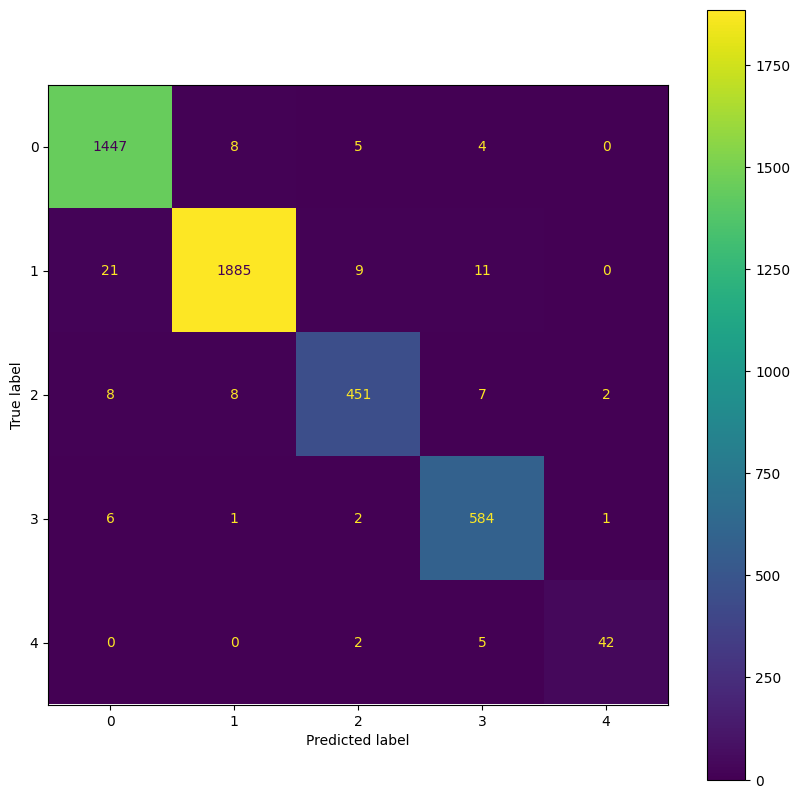

-----------------------------------------------------------------------------------------------------------------------------
XGB with PCA Features - Training accuracy: 0.9986
XGB with PCA Features - Test accuracy: 0.9898
XGB with PCA Features - Training precision: 0.9986
XGB with PCA Features - Test precision: 0.9898
XGB with PCA Features - Training recall: 0.9986
XGB with PCA Features - Test recall: 0.9898
XGB with PCA Features - Training F1 score: 0.9986
XGB with PCA Features - Test F1 score: 0.9897
XGB with PCA Features - Training time: 87.1116 seconds
XGB with PCA Features - Testing time: 0.0728 seconds


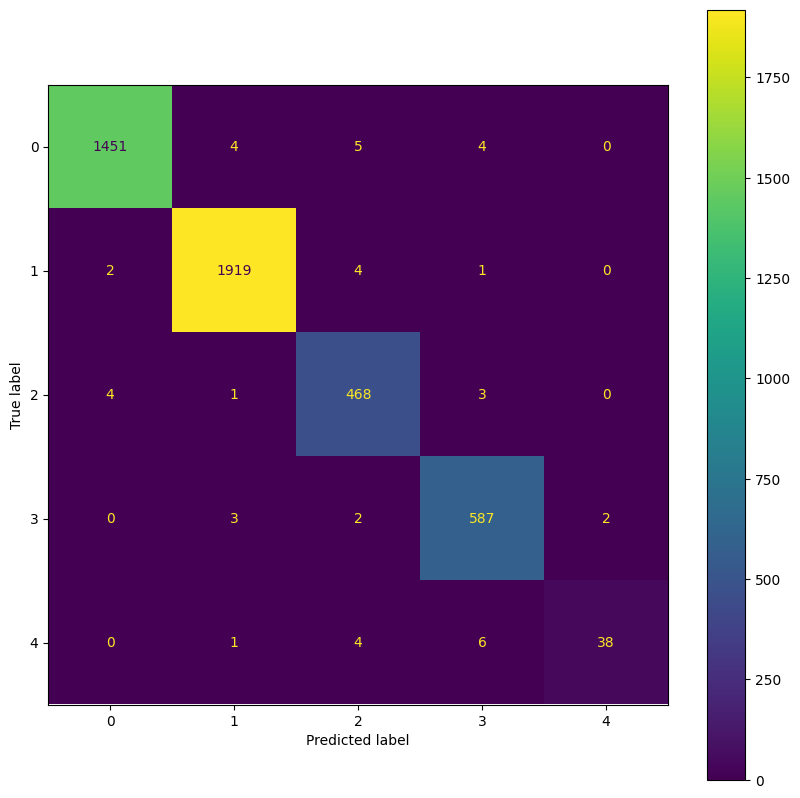

In [56]:
# Fit and evaluate RF model using manually selected features
xg_manual = xgb.XGBClassifier(objective='binary:logistic', n_estimators=20).fit(x_train, y_train)
evaluate_classification(xg_manual, "XGB with Features DT", x_train, x_test, y_train, y_test)

print('-----------------------------------------------------------------------------------------------------------------------------')

# Fit and evaluate RF model using PCA selected features
xg_pca = xgb.XGBClassifier(objective='binary:logistic', n_estimators=20).fit(x_train_reduced, y_train_reduced)
evaluate_classification(xg_pca, "XGB with PCA Features", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

Gradient Boosting Classifier

GB with Features DT - Training accuracy: 0.9756
GB with Features DT - Test accuracy: 0.9692
GB with Features DT - Training precision: 0.9758
GB with Features DT - Test precision: 0.9694
GB with Features DT - Training recall: 0.9756
GB with Features DT - Test recall: 0.9692
GB with Features DT - Training F1 score: 0.9756
GB with Features DT - Test F1 score: 0.9692
GB with Features DT - Training time: 9.5064 seconds
GB with Features DT - Testing time: 0.3535 seconds


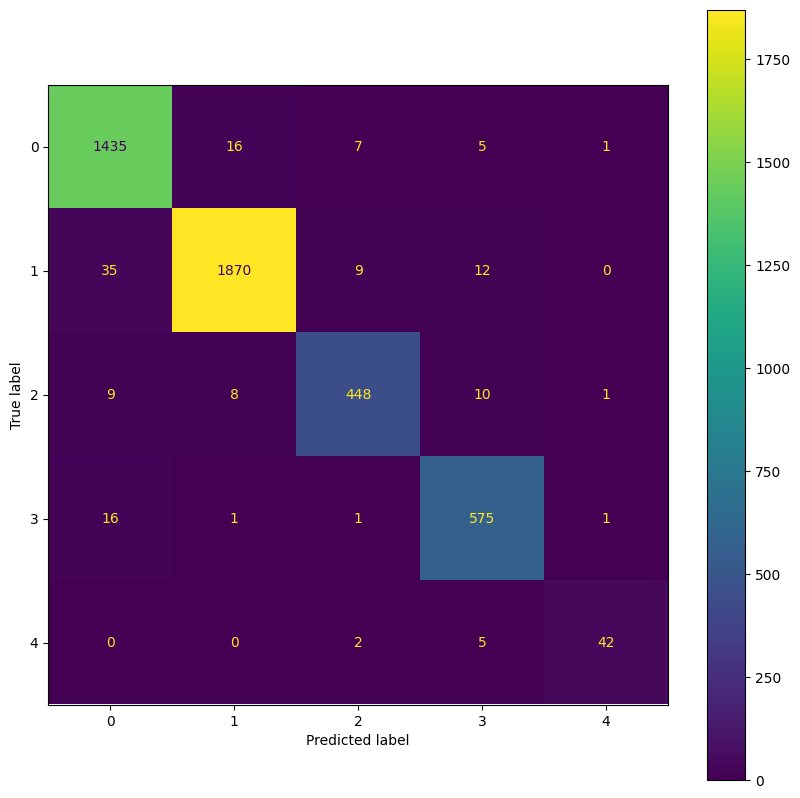

-----------------------------------------------------------------------------------------------------------------------------
GB with PCA Features - Training accuracy: 0.9966
GB with PCA Features - Test accuracy: 0.9867
GB with PCA Features - Training precision: 0.9966
GB with PCA Features - Test precision: 0.9866
GB with PCA Features - Training recall: 0.9966
GB with PCA Features - Test recall: 0.9867
GB with PCA Features - Training F1 score: 0.9966
GB with PCA Features - Test F1 score: 0.9865
GB with PCA Features - Training time: 171.0814 seconds
GB with PCA Features - Testing time: 0.2423 seconds


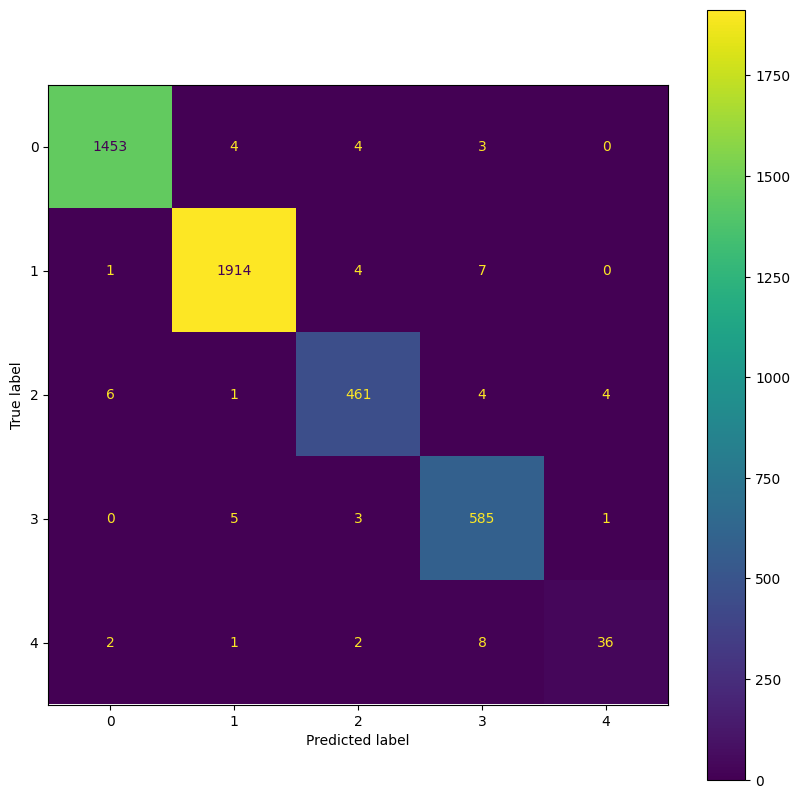

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

# Fit and evaluate GB model using manually selected features
gb_manual = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42).fit(x_train, y_train)
evaluate_classification(gb_manual, "GB with Features DT", x_train, x_test, y_train, y_test)

print('-----------------------------------------------------------------------------------------------------------------------------')

# Fit and evaluate GB model using PCA selected features
gb_pca = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42).fit(x_train_reduced, y_train_reduced)
evaluate_classification(gb_pca, "GB with PCA Features", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

# Comparison Between Model

Accuracy

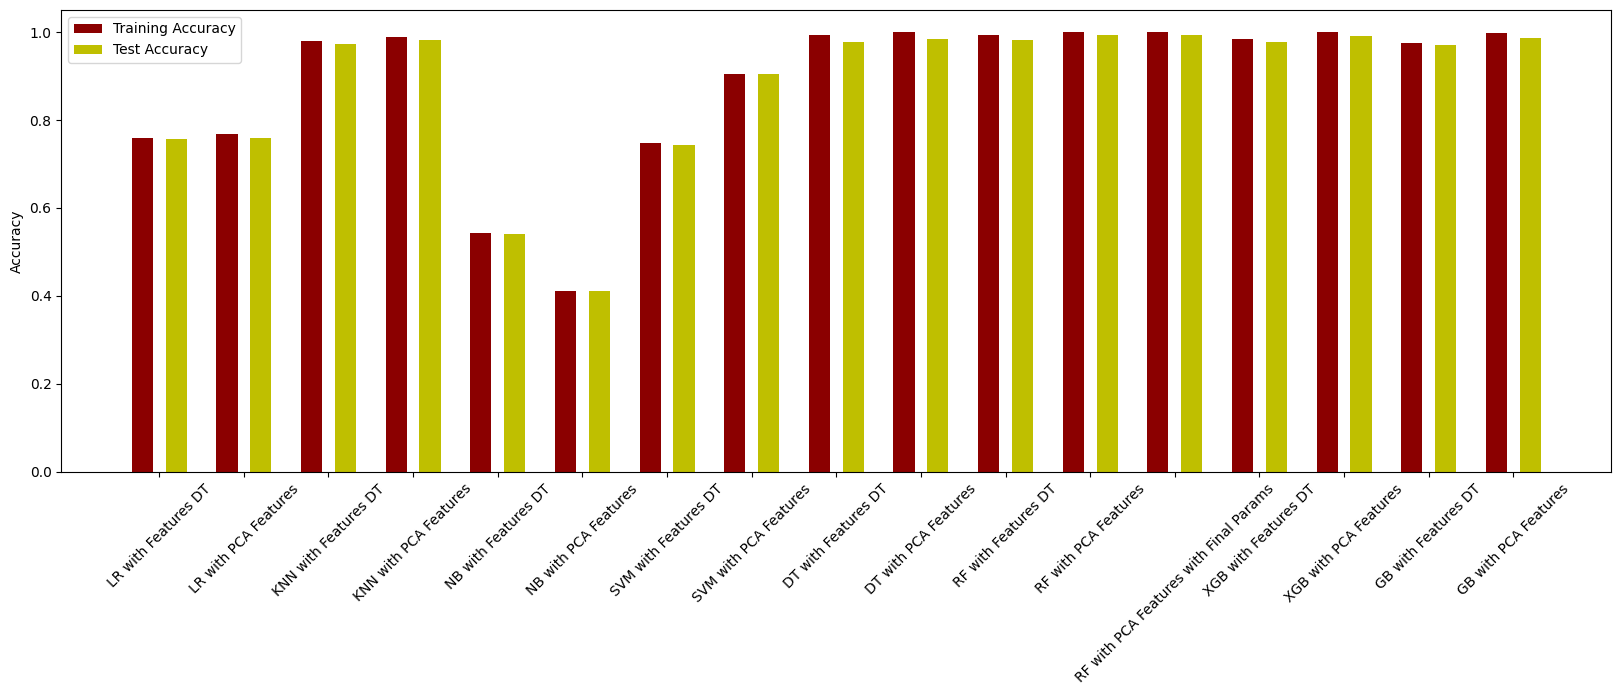

In [58]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[0] for value in values], color='darkred', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[1] for value in values], color='y', width=0.25, align='center')
ax.legend(["Training Accuracy", "Test Accuracy"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

Precesion

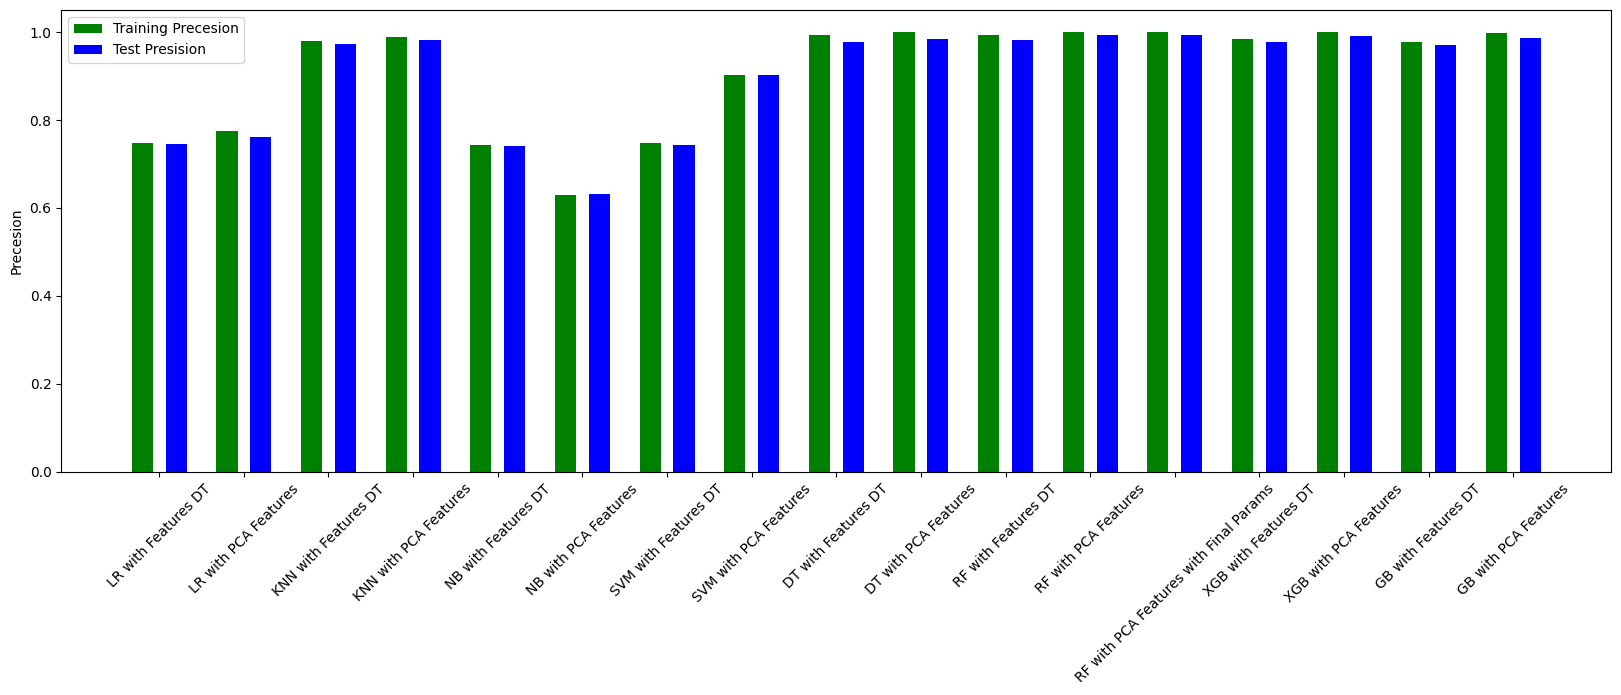

In [59]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[2] for value in values], color='g', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[3] for value in values], color='b', width=0.25, align='center')
ax.legend(["Training Precesion", "Test Presision"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Precesion")
plt.xticks(rotation=45)
plt.show()

Recall

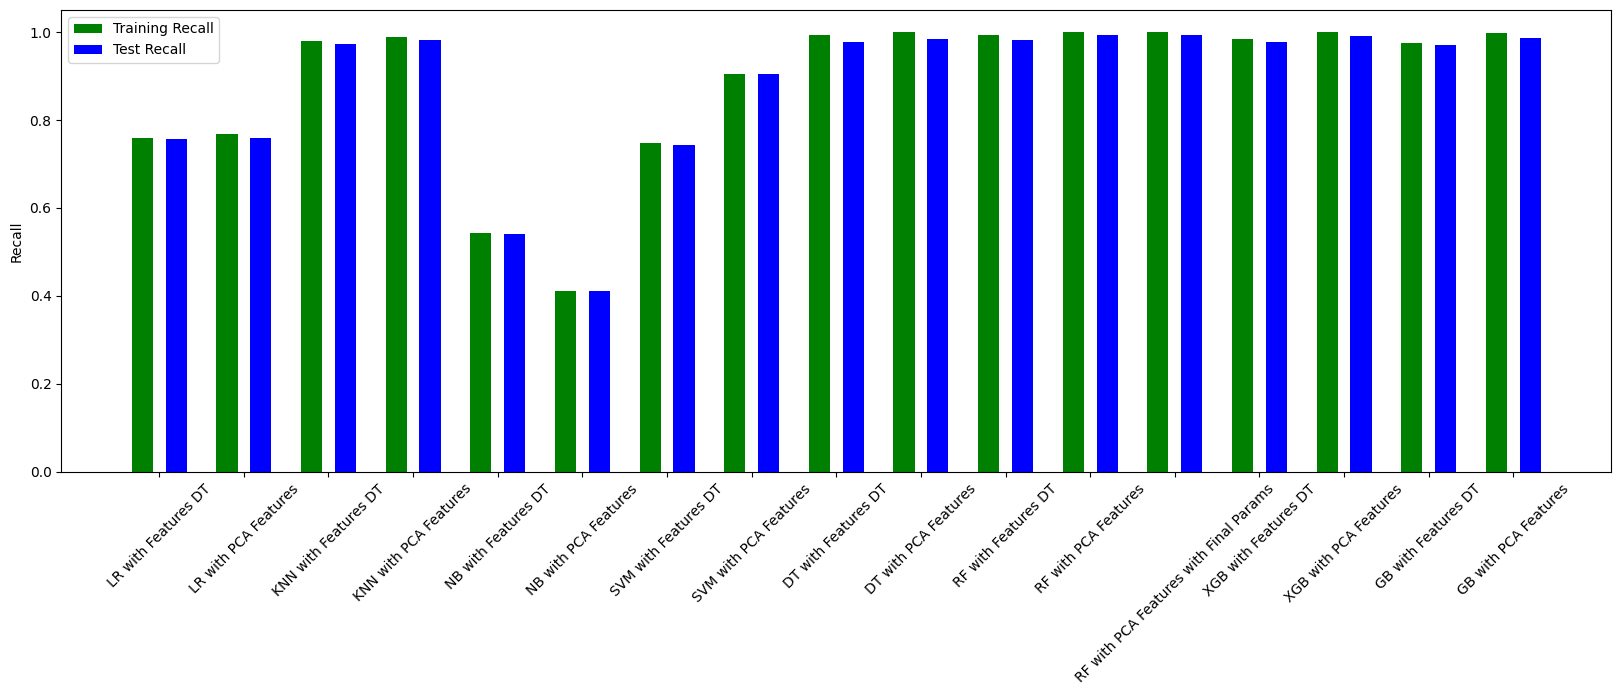

In [60]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[4] for value in values], color='g', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[5] for value in values], color='b', width=0.25, align='center')
ax.legend(["Training Recall", "Test Recall"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Recall")
plt.xticks(rotation=45)
plt.show()

Execution Time

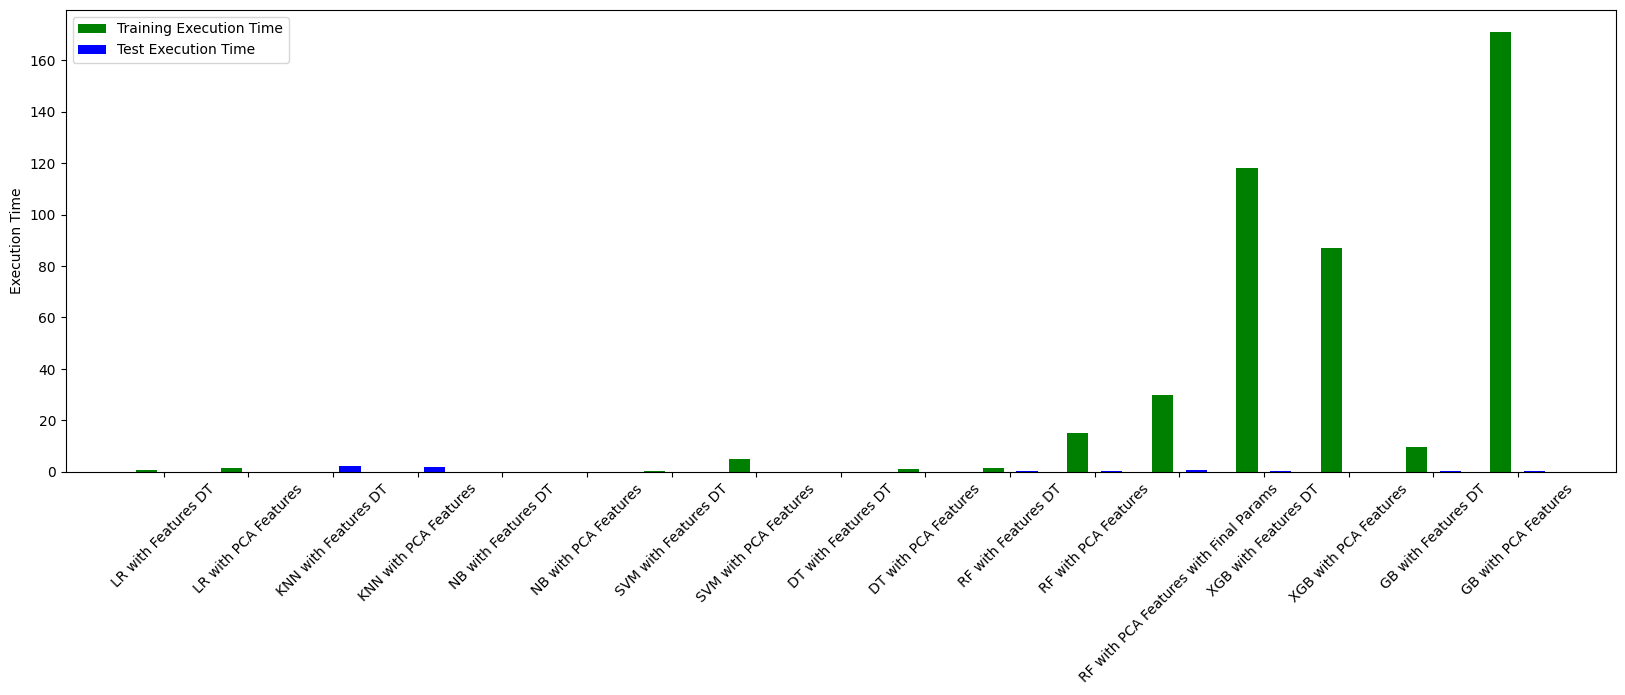

In [61]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[6] for value in values], color='g', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[7] for value in values], color='b', width=0.25, align='center')
ax.legend(["Training Execution Time", "Test Execution Time"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Execution Time")
plt.xticks(rotation=45)
plt.show()